# Essex County, MA School Districts

Using dataset merged with this notebook using data from Massachusetts Department of Education (DOE) and U.S. Census Bureau data for school districts: https://github.com/semerriam/essex-county-school-districts/blob/main/ec-school-data/essex_county_public_schools_two_towns.ipynb

##### Imports

In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [59]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
require('tidyr')
require('explore')
require('forcats')
# require('theme538')

In [4]:
pd.set_option("display.max_columns", None)

# Exploratory data analysis

### Loading Data

In [5]:
df = pd.read_csv("data//input_MA_DOE_Essex_county_profiles_w_census.csv", encoding="utf-8")
df

,district_code,district_name_w_charters,district_name_x,total_num_of_classes,average_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,native_hawaiian_pacific_islander_pct,multi-race_non-hispanic_pct,tests_taken_x,score=1_x,score=2_x,score=3_x,score=4_x,score=5_x,pct_score_1-2_x,pct_score_3-5_x,tests_taken_y,score=1_y,score=2_y,score=3_y,score=4_y,score=5_y,pct_score_1-2_y,pct_score_3-5_y,tests_takers,tests_taken_x.1,one_test,two_tests,three_tests,four_tests,five_or_more_tests,high_school_graduates_(num),attending_coll./univ._(num),attending_coll./univ._(pct),private_two-year_(pct),private_four-year_(pct),public_two-year_(pct),public_four-year_(pct),ma_community_college_(pct),ma_state_university_(pct),univ.of_mass._(pct),tests_taken_y.1,reading_/_writing,writing,math,num_in_cohort,pct_graduated,pct_still_in_school,pct_non-grad_completers,pct_h.s._equiv.,pct_dropped_out,pct_permanently_excluded,towns,school_name,fact,population_estimates_july_1_2021_(v2021),population_estimates_base_april_1_2020_(v2021),population_percent_change_-_april_1_2020_(estimates_base)_to_july_1_2021_(v2021),population_census_april_1_2020,population_census_april_1_2010,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,veterans_2015-2019,foreign_born_persons_percent_2015-2019,housing_units__july_1_2019__(v2019),owner-occupied_housing_unit_rate_2015-2019,median_value_of_owner-occupied_housing_units_2015-2019,median_selected_monthly_owner_costs_-with_a_mortgage_2015-2019,median_selected_monthly_owner_costs_-without_a_mortgage_2015-2019,median_gross_rent_2015-2019,building_permits_2020,households_2015-2019,persons_per_household_2015-2019,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2015-2019,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2015-2019,households_with_a_computer_percent_2015-2019,households_with_a_broadband_internet_subscription_percent_2015-2019,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2015-2019,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2015-2019,with_a_disability_under_age_65_years_percent_2015-2019,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2015-2019,in_civilian_labor_force_female_percent_of_population_age_16_years+_2015-2019,total_accommodation_and_food_services_sales_2012_($1000),total_health_care_and_social_assistance_receipts/revenue_2012_($1000),total_manufacturers_shipments_2012_($1000),total_retail_sales_2012_($1000),total_retail_sales_per_capita_2012,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2015-2019,median_household_income,per_capita_income_in_past_12_months_(in_2019_dollars)_2015-2019,persons_in_poverty_percent,total_employer_establishments_2019,total_employment_2019,total_annual_payroll_2019_($1000),total_employment_percent_change_2018-2019,total_nonemployer_establishments_2018,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
0,70000.0,Amesbury,Amesbury,"1,115",15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,84.0,126.0,43.0,40.0,1.0,0.0,0.0,151.0,102.0,67.5,0.0,33.3,24.5,42.2,22.5,3.9,13.7,45.0,596.0,NaN,570.0,165,87.9,9.1,0.0,0.0,3.0,0.0,Amesbury,Amesbury High School,"Amesbury Town city, Massachusetts",NaN,NaN,NaN,17366,16283,0.044,0.197,0.168,0.513,0.961,0.006,0.003,0.011,0.000,0.019,0.025,

### Cleaning the data

In [6]:
df = df.rename(columns={'district_name_x': 'district_name'})

df = df.rename(columns={'average_class_size': 'avg_class_size'})

df = df.rename(columns={'native_hawaiian_pacific_islander_pct': 'nhpi_pct'})

df = df.rename(columns={'multi-race_non-hispanic_pct': 'mrnh_pct'})

df = df.rename(columns={'pct_score_3-5_x': 'ap_pct_score_3-5'})

df = df.rename(columns={'attending_coll./univ._(pct)': 'attend_uni_(pct)'})

df = df.rename(columns={'population_census_april_1_2020': 'pop_census_2020'})

df = df.rename(columns={'hispanic_or_latino_percent': 'hisp_latino_pct'})

df = df.rename(columns={'white_alone_not_hispanic_or_latino_percent': 'white_pop_nhl'})

df = df.rename(columns={'foreign_born_persons_percent_2015-2019': 'foreign_born_pct'})

df = df.rename(columns={'per_capita_income_in_past_12_months_(in_2019_dollars)_2015-2019': 'per_cap_income_12_mos'})

df = df.rename(columns={'population_per_square_mile_2010': 'pop_sq_mi_2010'})

In [7]:
df.head(2)

,district_code,district_name_w_charters,district_name,total_num_of_classes,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,tests_taken_x,score=1_x,score=2_x,score=3_x,score=4_x,score=5_x,pct_score_1-2_x,ap_pct_score_3-5,tests_taken_y,score=1_y,score=2_y,score=3_y,score=4_y,score=5_y,pct_score_1-2_y,pct_score_3-5_y,tests_takers,tests_taken_x.1,one_test,two_tests,three_tests,four_tests,five_or_more_tests,high_school_graduates_(num),attending_coll./univ._(num),attend_uni_(pct),private_two-year_(pct),private_four-year_(pct),public_two-year_(pct),public_four-year_(pct),ma_community_college_(pct),ma_state_university_(pct),univ.of_mass._(pct),tests_taken_y.1,reading_/_writing,writing,math,num_in_cohort,pct_graduated,pct_still_in_school,pct_non-grad_completers,pct_h.s._equiv.,pct_dropped_out,pct_permanently_excluded,towns,school_name,fact,population_estimates_july_1_2021_(v2021),population_estimates_base_april_1_2020_(v2021),population_percent_change_-_april_1_2020_(estimates_base)_to_july_1_2021_(v2021),pop_census_2020,population_census_april_1_2010,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hisp_latino_pct,white_pop_nhl,veterans_2015-2019,foreign_born_pct,housing_units__july_1_2019__(v2019),owner-occupied_housing_unit_rate_2015-2019,median_value_of_owner-occupied_housing_units_2015-2019,median_selected_monthly_owner_costs_-with_a_mortgage_2015-2019,median_selected_monthly_owner_costs_-without_a_mortgage_2015-2019,median_gross_rent_2015-2019,building_permits_2020,households_2015-2019,persons_per_household_2015-2019,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2015-2019,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2015-2019,households_with_a_computer_percent_2015-2019,households_with_a_broadband_internet_subscription_percent_2015-2019,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2015-2019,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2015-2019,with_a_disability_under_age_65_years_percent_2015-2019,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2015-2019,in_civilian_labor_force_female_percent_of_population_age_16_years+_2015-2019,total_accommodation_and_food_services_sales_2012_($1000),total_health_care_and_social_assistance_receipts/revenue_2012_($1000),total_manufacturers_shipments_2012_($1000),total_retail_sales_2012_($1000),total_retail_sales_per_capita_2012,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_percent,total_employer_establishments_2019,total_employment_2019,total_annual_payroll_2019_($1000),total_employment_percent_change_2018-2019,total_nonemployer_establishments_2018,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,pop_sq_mi_2010,land_area_in_square_miles_2010,fips_code
0,70000.0,Amesbury,Amesbury,"1,115",15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,84.0,126.0,43.0,40.0,1.0,0.0,0.0,151.0,102.0,67.5,0.0,33.3,24.5,42.2,22.5,3.9,13.7,45.0,596.0,NaN,570.0,165,87.9,9.1,0.0,0.0,3.0,0.0,Amesbury,Amesbury High School,"Amesbury Town city, Massachusetts",NaN,NaN,NaN,17366,16283,0.044,0.197,0.168,0.513,0.961,0.006,0.003,0.011,0.0,0.019,0.025,0.938,814,0.043,X,0.702,336200,2252,866,1195,X,7215,2.37,0.882,0.044,0.928,0.878,0.942,0.411,0.098,0.018,0.708,0.668,25617,61249,246210,112942,6830.0,32.6,82468,42607,0.063,X,X,X,X,X,1666,817,761,30,15

In [8]:
df_subset = df[['district_name', 'avg_class_size', 'number_of_students', 'african_american_pct', 'asian_pct', 'hispanic_pct', 'white_pct', 'native_american_pct', 'nhpi_pct', 'mrnh_pct', 'ap_pct_score_3-5', 'high_school_graduates_(num)', 'attending_coll./univ._(num)', 'attend_uni_(pct)', 'private_four-year_(pct)', 'reading_/_writing', 'math', 'num_in_cohort',  'pct_graduated', 'pct_dropped_out', 'towns', 'school_name', 'pop_census_2020', 'population_census_april_1_2010', 'white_alone_percent', 'black_or_african_american_alone_percent', 'american_indian_and_alaska_native_alone_percent', 'asian_alone_percent', 'native_hawaiian_and_other_pacific_islander_alone_percent', 'two_or_more_races_percent', 'hisp_latino_pct', 'white_pop_nhl', 'foreign_born_pct', 'persons_per_household_2015-2019', 'median_household_income', 'per_cap_income_12_mos', 'persons_in_poverty_percent', 'pop_sq_mi_2010', 'land_area_in_square_miles_2010']]
df_subset

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,high_school_graduates_(num),attending_coll./univ._(num),attend_uni_(pct),private_four-year_(pct),reading_/_writing,math,num_in_cohort,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,population_census_april_1_2010,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hisp_latino_pct,white_pop_nhl,foreign_born_pct,persons_per_household_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_percent,pop_sq_mi_2010,land_area_in_square_miles_2010
0,Amesbury,15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,58.7,151.0,102.0,67.5,33.3,596.0,570.0,165,87.9,3.0,Amesbury,Amesbury High School,17366,16283,0.961,0.006,0.003,0.011,0.000,0.019,0.025,0.938,0.043,2.37,82468,42607,0.063,1327.8,12.26
1,Andover,12.3,"5,614",2.7,19.0,7.9,66.5,0.1,0.1,3.7,74.4,433.0,351.0,81.1,52.4,607.0,611.0,441,95.2,0.9,Andover,Andover High School,9735,8762,0.870,0.026,0.001,0.079,0.000,0.023,0.025,0.847,0.135,2.15,95600,55457,0.095,2376.6,3.69
2,Beverly,16.4,"4,655",3.5,2.5,14.9,75.0,0.1,0.0,4.0,56.5,289.0,217.0,75.1,36.9,548.0,522.0,310,91.0,4.8,Beverly,Beverly High School,42670,39502,0.921,0.021,0.001,0.022,0.001,0.027,0.051,0.885,0.080,2.34,80586,45803,0.093,2617.2,15.09
3,Danvers,16.8,"3,327",2.3,2.4,9.1,83.6,0.1,0.0,2.6,55.7,230.0,163.0,70.9,39.3,549.0,530.0,237,95.8,0.8,Danvers,Danvers High School,28087,26493,0.917,0.024,0.001,0.026,0.000,0.023,0.051,0.876,0.105,2.51,89250,44005,0.071,1995.6,13.28
4,Georgetown,14.9,"1,223",0.8,1.0,2.4,93.7,0.0,0.2,2.0,87.2,109.0,90.0,82.6,41.1,577.0,569.0,112,95.5,2.7,Georgetown,Georgetown High School,8470,8183,0.958,0.008,0.004,0.012,0.000,0.012,0.035,0.932,0.037,2.63,128466,53243,0.031,636.3,12.86
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,177.0,87.0,49.2,39.1,542.0,532.0,190,83.7,5.8,Gloucester,Gloucester High School,29729,28789,0.936,0.017,0.000,0.019,0.000,0.023,0.024,0.919,0.086,2.27,72574,43321,0.100,1099.0,26.20
6,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,146.0,119.0,81.5,57.1,592.0,587.0,143,97.2,0.7,Hamilton,Hamilton-Wenham Regional High School,7561,7764,0.921,0.003,0.000,0.060,0.002,0.011,0.015,0.910,0.096,2.89,127813,49347,0.119,547.4,14.18
7,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,146.0,119.0,81.5,57.1,592.0,587.0,143,97.2,0.7,Wenham,Hamilton-Wenham Regional High School,7561,7764,0.921,0.003,0.000,0.060,0.002,0.011,0.015,0.910,0.096,2.89,127813,49347,0.119,547.4,14.18
8,Haverhill,17.2,"7,848",5.2,1.8,40.9,49.7,0.2,0.1,2.1,48.4,413.0,235.0,56.9,28.5,547.0,545.0,491,80.4,7.7,Haverhill,Haverhill High School,67787,60879,0.803,0.036,0.001,0.013,0.000,0.039,0.232,0.697,0.107,2.58,69426,33918,0.125,1846.5,32.97
9,Ipswich,15.1,"1,604",1.3,1.3,7.1,86.3,0.1,0.0,4.0,78.6,133.0,93.0,69.9,45.2,575.0,572.0,142,90.8,4.9,Ipswich,Ipswich High School,13785,13175,0.944,0.022,0.000,0.009,0.000,0.011,0.042,0.920,0.065,2.40,93212,52393,0.076,410.3,32.11


In [9]:
df_subset.columns = df_subset.columns.str.replace("(num)", "num", regex=False)
df_subset.columns = df_subset.columns.str.replace("(pct)", "pct", regex=False)
df_subset.columns = df_subset.columns.str.replace("percent", "pct", regex=False)
df_subset.columns = df_subset.columns.str.replace("/", "", regex=False)
df_subset.columns = df_subset.columns.str.replace(".", "", regex=False)

In [10]:
df_subset2 = df_subset[['district_name', 'avg_class_size', 'number_of_students', 'african_american_pct', 'asian_pct', 'hispanic_pct', 'white_pct', 'native_american_pct', 'nhpi_pct', 'mrnh_pct', 'ap_pct_score_3-5', 'attending_colluniv_num', 'attend_uni_pct', 'reading__writing', 'math', 'pct_graduated', 'pct_dropped_out', 'towns', 'school_name', 'pop_census_2020', 'white_alone_pct', 'asian_alone_pct', 'two_or_more_races_pct', 'hisp_latino_pct', 'white_pop_nhl', 'foreign_born_pct', 'median_household_income', 'per_cap_income_12_mos', 'persons_in_poverty_pct', 'pop_sq_mi_2010']]
df_subset2.head(3)

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010
0,Amesbury,15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,58.7,102.0,67.5,596.0,570.0,87.9,3.0,Amesbury,Amesbury High School,17366,0.961,0.011,0.019,0.025,0.938,0.043,82468,42607,0.063,1327.8
1,Andover,12.3,"5,614",2.7,19.0,7.9,66.5,0.1,0.1,3.7,74.4,351.0,81.1,607.0,611.0,95.2,0.9,Andover,Andover High School,9735,0.870,0.079,0.023,0.025,0.847,0.135,95600,55457,0.095,2376.6
2,Beverly,16.4,"4,655",3.5,2.5,14.9,75.0,0.1,0.0,4.0,56.5,217.0,75.1,548.0,522.0,91.0,4.8,Beverly,Beverly High School,42670,0.921,0.022,0.027,0.051,0.885,0.080,80586,45803,0.093,2617.2


In [11]:
for col in df_subset2.columns:
    print(col)

district_name
avg_class_size
number_of_students
african_american_pct
asian_pct
hispanic_pct
white_pct
native_american_pct
nhpi_pct
mrnh_pct
ap_pct_score_3-5
attending_colluniv_num
attend_uni_pct
reading__writing
math
pct_graduated
pct_dropped_out
towns
school_name
pop_census_2020
white_alone_pct
asian_alone_pct
two_or_more_races_pct
hisp_latino_pct
white_pop_nhl
foreign_born_pct
median_household_income
per_cap_income_12_mos
persons_in_poverty_pct
pop_sq_mi_2010


In [12]:
df_subset3 = df_subset[['district_name', 'avg_class_size', 'number_of_students', 'hispanic_pct', 'white_pct', 'ap_pct_score_3-5', 'attend_uni_pct', 'reading__writing', 'math', 'pct_graduated', 'pct_dropped_out', 'towns', 'school_name', 'foreign_born_pct', 'median_household_income',  'persons_in_poverty_pct', 'pop_sq_mi_2010']]
df_subset3.head(3)

,district_name,avg_class_size,number_of_students,hispanic_pct,white_pct,ap_pct_score_3-5,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,towns,school_name,foreign_born_pct,median_household_income,persons_in_poverty_pct,pop_sq_mi_2010
0,Amesbury,15.1,"1,869",9.7,82.6,58.7,67.5,596.0,570.0,87.9,3.0,Amesbury,Amesbury High School,0.043,82468,0.063,1327.8
1,Andover,12.3,"5,614",7.9,66.5,74.4,81.1,607.0,611.0,95.2,0.9,Andover,Andover High School,0.135,95600,0.095,2376.6
2,Beverly,16.4,"4,655",14.9,75.0,56.5,75.1,548.0,522.0,91.0,4.8,Beverly,Beverly High School,0.080,80586,0.093,2617.2


## Exploring the data

### Summary Stats

In [13]:
df_subset2.corr().describe()

,avg_class_size,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.008683,0.077929,0.136925,0.025937,-0.052849,0.055059,0.043585,0.029938,0.029168,0.119811,0.033304,0.012557,0.030632,0.026105,-0.007446,-0.021334,-0.029116,0.118813,0.059843,-0.010387,-0.013237,0.040004,0.067252,0.054720,-0.022780,0.011005
std,0.287703,0.561648,0.283903,0.729402,0.736055,0.331350,0.260161,0.267621,0.625983,0.493638,0.658560,0.610662,0.596055,0.653574,0.648804,0.549690,0.692519,0.364329,0.575542,0.654637,0.690295,0.650700,0.595880,0.608465,0.632731,0.587120
min,-0.282712,-0.691746,-0.246031,-0.978060,-0.978060,-0.408986,-0.338843,-0.344427,-0.769310,-0.732945,-0.842609,-0.769149,-0.751799,-0.911678,-0.911678,-0.919864,-0.946454,-0.488992,-0.787164,-0.965540,-0.976029,-0.931333,-0.715209,-0.739381,-0.806787,-0.842446
25%,-0.198538,-0.526986,0.008832,-0.709962,-0.759699,-0.242668,-0.105262,-0.120386,-0.603894,-0.280517,-0.613311,-0.550401,-0.459459,-0.584926,-0.705046,-0.229698,-0.726334,-0.150978,-0.536538,-0.639851,-0.691458,-0.558219,-0.456538,-0.461026,-0.733338,-0.458700
50%,-0.121079,0.325579,0.086262,0.109747,-0.230028,0.127345,0.009412,-0.014659,-0.106066,0.130934,-0.074783,-0.186435,-0.172412,-0.026911,0.085592,0.044916,-0.146687,0.126823,0.192253,0.022368,-0.126026,0.109567,-0.169200,-0.169977,0.095787,0.035445
75%,0.197808,0.547869,0.218827,0.738847,0.704195,0.202627,0.144089,0.109947,0.699574,0.543618,0.716723,0.656909,0.637695,0.699162,0.614059,0.250928,0.655288,0.357773,0.582985,0.616209,0.678511,0.662917,0.674391,0.719354,0.518967,0.567791
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# correlation matrix
df_subset2.corr().round(2)

,avg_class_size,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010
avg_class_size,1.00,0.20,-0.20,0.27,-0.23,0.21,-0.24,-0.19,-0.12,0.22,-0.12,-0.23,-0.22,-0.10,0.11,0.28,-0.18,-0.28,0.15,0.31,-0.25,0.17,-0.19,-0.17,-0.17,0.20
african_american_pct,0.20,1.00,0.28,0.59,-0.69,0.50,-0.08,0.38,-0.49,0.39,-0.63,-0.59,-0.63,-0.58,0.68,0.71,-0.60,0.38,0.74,0.38,-0.52,0.56,-0.53,-0.47,0.49,0.58
asian_pct,-0.20,0.28,1.00,0.05,-0.24,0.15,0.15,0.27,0.06,0.54,0.11,0.02,0.08,0.10,-0.04,0.06,-0.25,0.79,0.29,0.01,-0.15,0.24,-0.00,0.02,0.14,0.09
hispanic_pct,0.27,0.59,0.05,1.00,-0.98,0.17,-0.16,-0.05,-0.77,0.60,-0.77,-0.67,-0.61,-0.80,0.75,0.92,-0.95,0.23,0.70,0.96,-0.98,0.91,-0.67,-0.72,0.80,0.85
white_pct,-0.23,-0.69,-0.24,-0.98,1.00,-0.23,0.12,-0.07,0.75,-0.66,0.76,0.68,0.62,0.78,-0.75,-0.92,0.96,-0.38,-0.76,-0.91,0.96,-0.92,0.68,0.71,-0.81,-0.84
native_american_pct,0.21,0.50,0.15,0.17,-0.23,1.00,0.50,0.14,-0.25,0.04,-0.35,-0.41,-0.39,-0.27,0.40,0.24,-0.12,0.14,0.24,0.04,-0.10,0.16,-0.30,-0.33,0.14,0.12
nhpi_pct,-0.24,-0.08,0.15,-0.16,0.12,0.50,1.00,0.05,0.14,-0.11,0.02,-0.08,-0.01,0.03,-0.01,-0.18,0.14,0.21,-0.02,-0.18,0.15,-0.16,0.17,-0.03,0.05,-0.34
mrnh_pct,-0.19,0.38,0.27,-0.05,-0.07,0.14,0.05,1.00,-0.09,-0.01,-0.13,-0.20,-0.34,-0.08,0.10,0.03,0.01,0.31,0.25,-0.23,0.11,-0.09,-0.27,-0.17,0.05,-0.02
ap_pct_score_3-5,-0.12,-0.49,0.06,-0.77,0.75,-0.25,0.14,-0.09,1.00,-0.31,0.80,0.61,0.64,0.66,-0.64,-0.76,0.71,-0.15,-0.49,-0.70,0.72,-0.66,0.77,0.74,-0.74,-0.67
attending_colluniv_num,0.22,0.39,0.54,0.60,-0.66,0.04,-0.11,-0.01,-0.31,1.00,-0.22,-0.31,-0.21,-0.29,0.34,0.65,-0.73,0.52,0.68,0.62,-0.70,0.70,-0.25,-0.33,0.40,0.55


In [15]:
df_subset3.corr().round(2)

,avg_class_size,hispanic_pct,white_pct,ap_pct_score_3-5,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,foreign_born_pct,median_household_income,persons_in_poverty_pct,pop_sq_mi_2010
avg_class_size,1.00,0.27,-0.23,-0.12,-0.12,-0.23,-0.22,-0.10,0.11,0.17,-0.19,-0.17,0.20
hispanic_pct,0.27,1.00,-0.98,-0.77,-0.77,-0.67,-0.61,-0.80,0.75,0.91,-0.67,0.80,0.85
white_pct,-0.23,-0.98,1.00,0.75,0.76,0.68,0.62,0.78,-0.75,-0.92,0.68,-0.81,-0.84
ap_pct_score_3-5,-0.12,-0.77,0.75,1.00,0.80,0.61,0.64,0.66,-0.64,-0.66,0.77,-0.74,-0.67
attend_uni_pct,-0.12,-0.77,0.76,0.80,1.00,0.69,0.72,0.89,-0.84,-0.62,0.83,-0.77,-0.60
reading__writing,-0.23,-0.67,0.68,0.61,0.69,1.00,0.96,0.70,-0.77,-0.52,0.67,-0.62,-0.45
math,-0.22,-0.61,0.62,0.64,0.72,0.96,1.00,0.69,-0.75,-0.44,0.75,-0.60,-0.43
pct_graduated,-0.10,-0.80,0.78,0.66,0.89,0.70,0.69,1.00,-0.91,-0.58,0.75,-0.78,-0.64
pct_dropped_out,0.11,0.75,-0.75,-0.64,-0.84,-0.77,-0.75,-0.91,1.00,0.57,-0.70,0.70,0.58
foreign_born_pct,0.17,0.91,-0.92,-0.66,-0.62,-0.52,-0.44,-0.58,0.57,1.00,-0.52,0.74,0.83


In [16]:
import seaborn as sns
# sns.pairplot(df_subset)

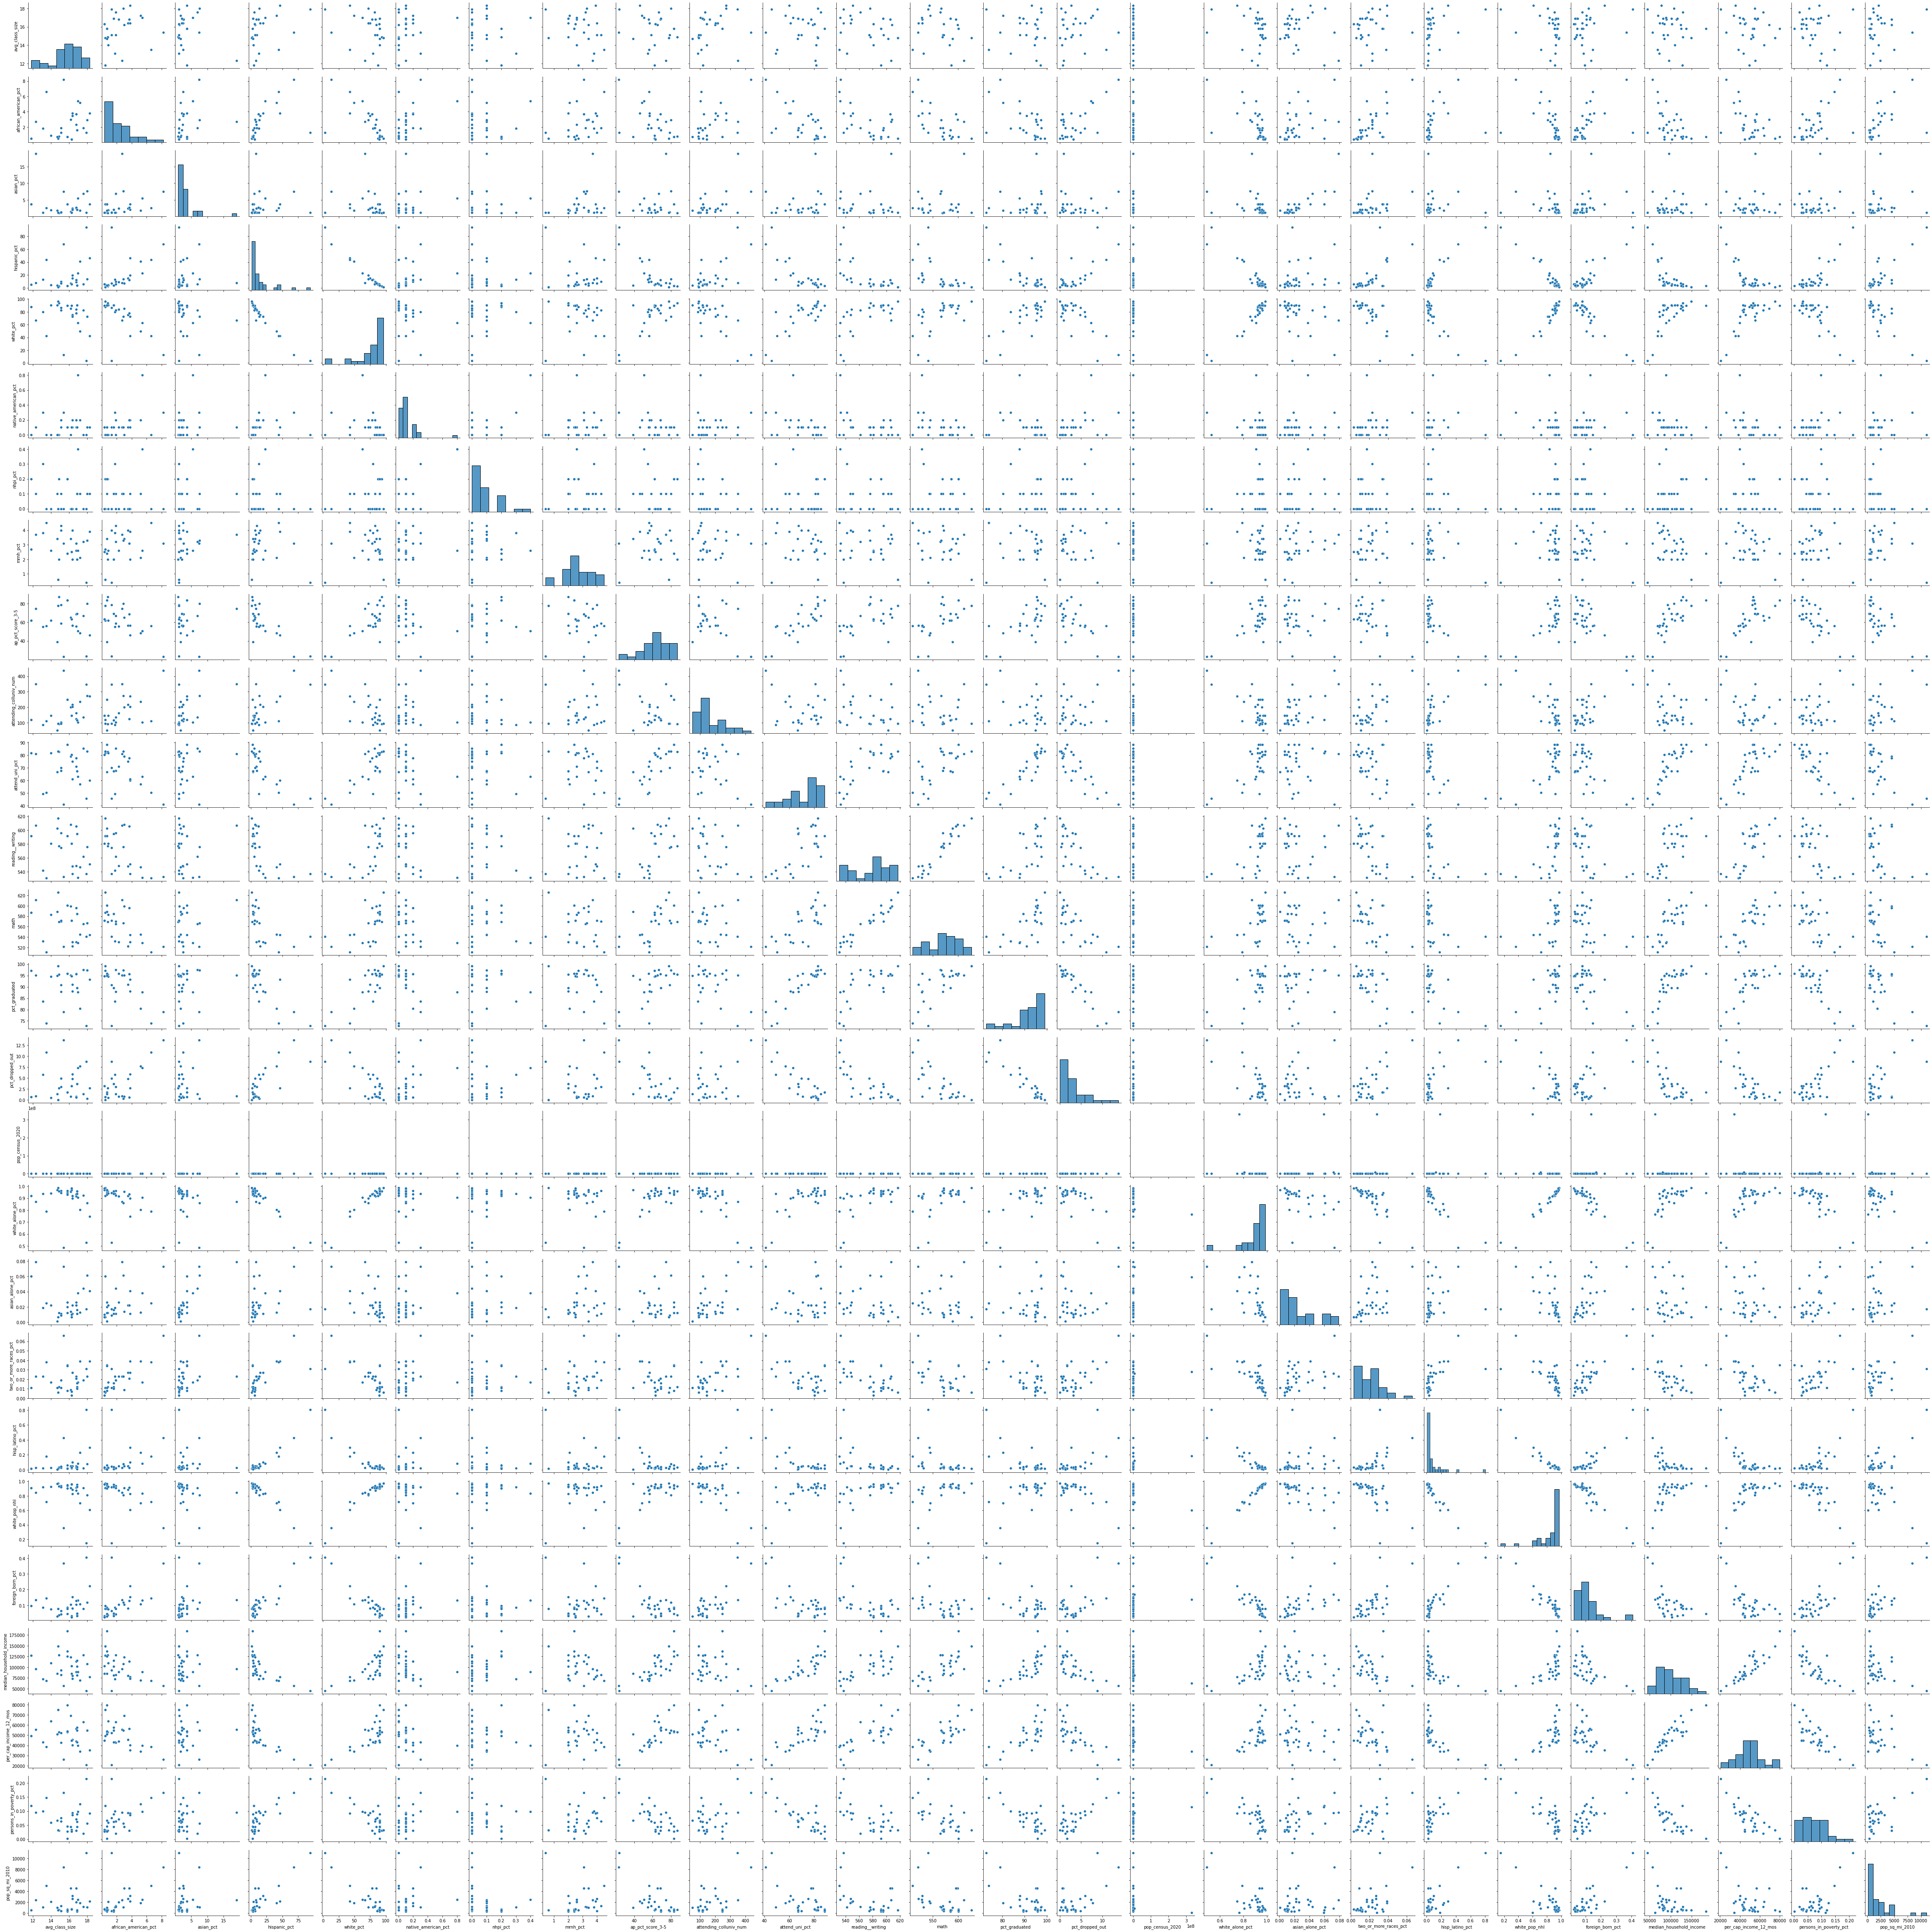

In [17]:
plt = sns.pairplot(df_subset2)

In [18]:
# correlation matrix
df_subset3.corr().round(2)

,avg_class_size,hispanic_pct,white_pct,ap_pct_score_3-5,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,foreign_born_pct,median_household_income,persons_in_poverty_pct,pop_sq_mi_2010
avg_class_size,1.00,0.27,-0.23,-0.12,-0.12,-0.23,-0.22,-0.10,0.11,0.17,-0.19,-0.17,0.20
hispanic_pct,0.27,1.00,-0.98,-0.77,-0.77,-0.67,-0.61,-0.80,0.75,0.91,-0.67,0.80,0.85
white_pct,-0.23,-0.98,1.00,0.75,0.76,0.68,0.62,0.78,-0.75,-0.92,0.68,-0.81,-0.84
ap_pct_score_3-5,-0.12,-0.77,0.75,1.00,0.80,0.61,0.64,0.66,-0.64,-0.66,0.77,-0.74,-0.67
attend_uni_pct,-0.12,-0.77,0.76,0.80,1.00,0.69,0.72,0.89,-0.84,-0.62,0.83,-0.77,-0.60
reading__writing,-0.23,-0.67,0.68,0.61,0.69,1.00,0.96,0.70,-0.77,-0.52,0.67,-0.62,-0.45
math,-0.22,-0.61,0.62,0.64,0.72,0.96,1.00,0.69,-0.75,-0.44,0.75,-0.60,-0.43
pct_graduated,-0.10,-0.80,0.78,0.66,0.89,0.70,0.69,1.00,-0.91,-0.58,0.75,-0.78,-0.64
pct_dropped_out,0.11,0.75,-0.75,-0.64,-0.84,-0.77,-0.75,-0.91,1.00,0.57,-0.70,0.70,0.58
foreign_born_pct,0.17,0.91,-0.92,-0.66,-0.62,-0.52,-0.44,-0.58,0.57,1.00,-0.52,0.74,0.83


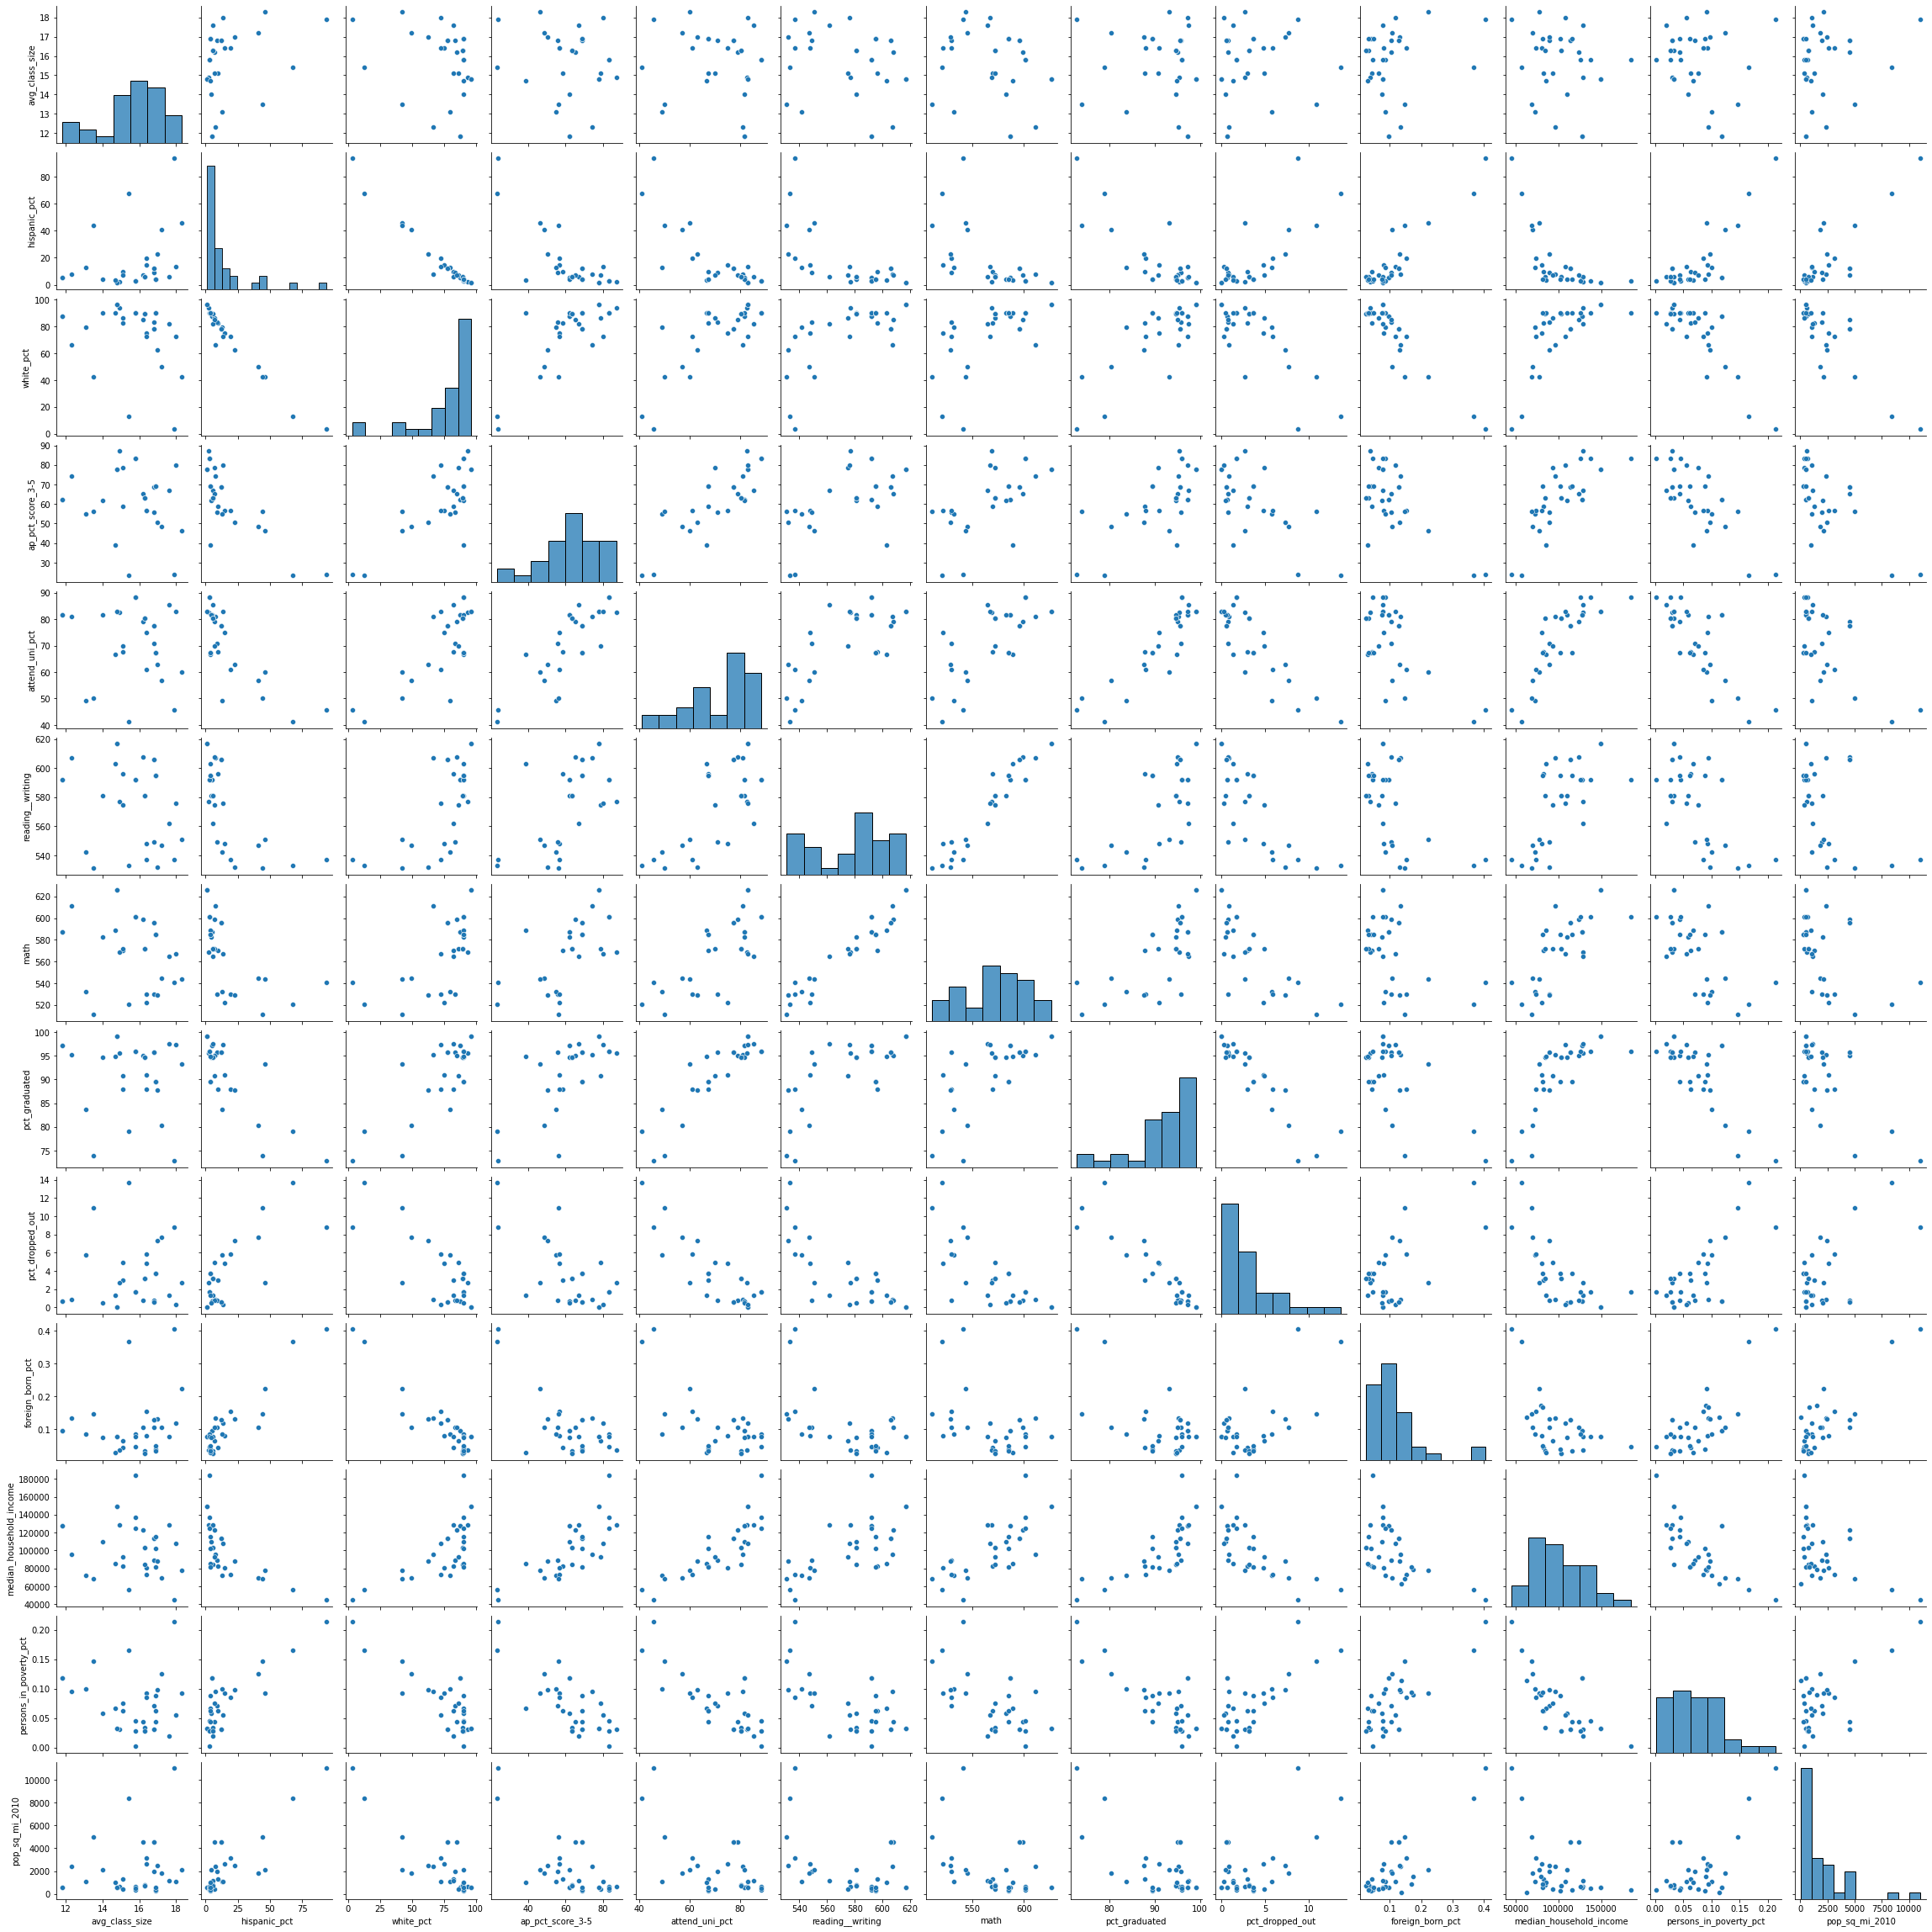

In [19]:
plt = sns.pairplot(df_subset3)

### Plots (exploratory)

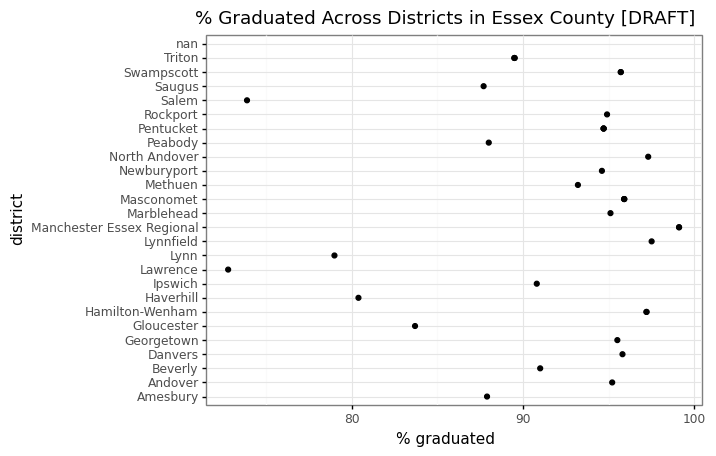

<ggplot: (774833050)>

In [20]:
# what percentage of students graduate across districts in the county?
display(
    ggplot(df_subset2,                    # data
        aes('pct_graduated', 'district_name')) +          # aesthetics
        geom_point() +               # geometry
        theme_bw() + 
        labs(
            title = "% Graduated Across Districts in Essex County [DRAFT]",
            y = "district",
            x = "% graduated"
        )
)   

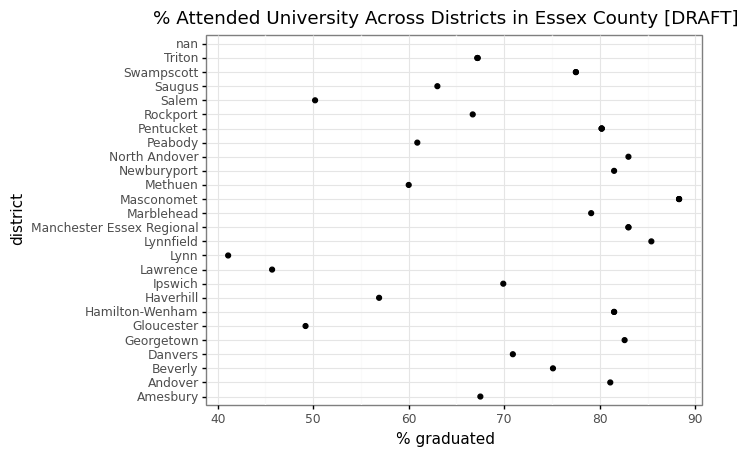

<ggplot: (774845708)>

In [21]:
# what does university attendance look like across districts in the county?
display(
    ggplot(df_subset2,                    # data
        aes('attend_uni_pct', 'district_name')) +          # aesthetics
        geom_point() +               # geometry
        theme_bw() + 
        labs(
            title = "% Attended University Across Districts in Essex County [DRAFT]",
            y = "district",
            x = "% graduated"
        )
)   

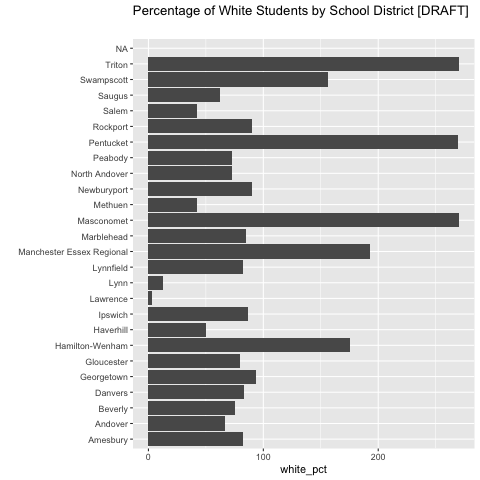

In [22]:
%%R -i df_subset2

df
plt <-ggplot(df_subset2) + 
  aes(x = district_name) +
  aes(y = white_pct) +
#   aes(fill = `Column (text)`) +
#   facet_grid(Column ~ .) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(
    values = colorRampPalette(
      RColorBrewer::brewer.pal(n = 9, name = "Purples"))(6), 
                    guide = guide_legend(reverse = TRUE)) +
  labs(fill = "") +
  xlab("") +
  labs(title = "Percentage of White Students by School District [DRAFT]") +
  labs(subtitle = "") 

plt

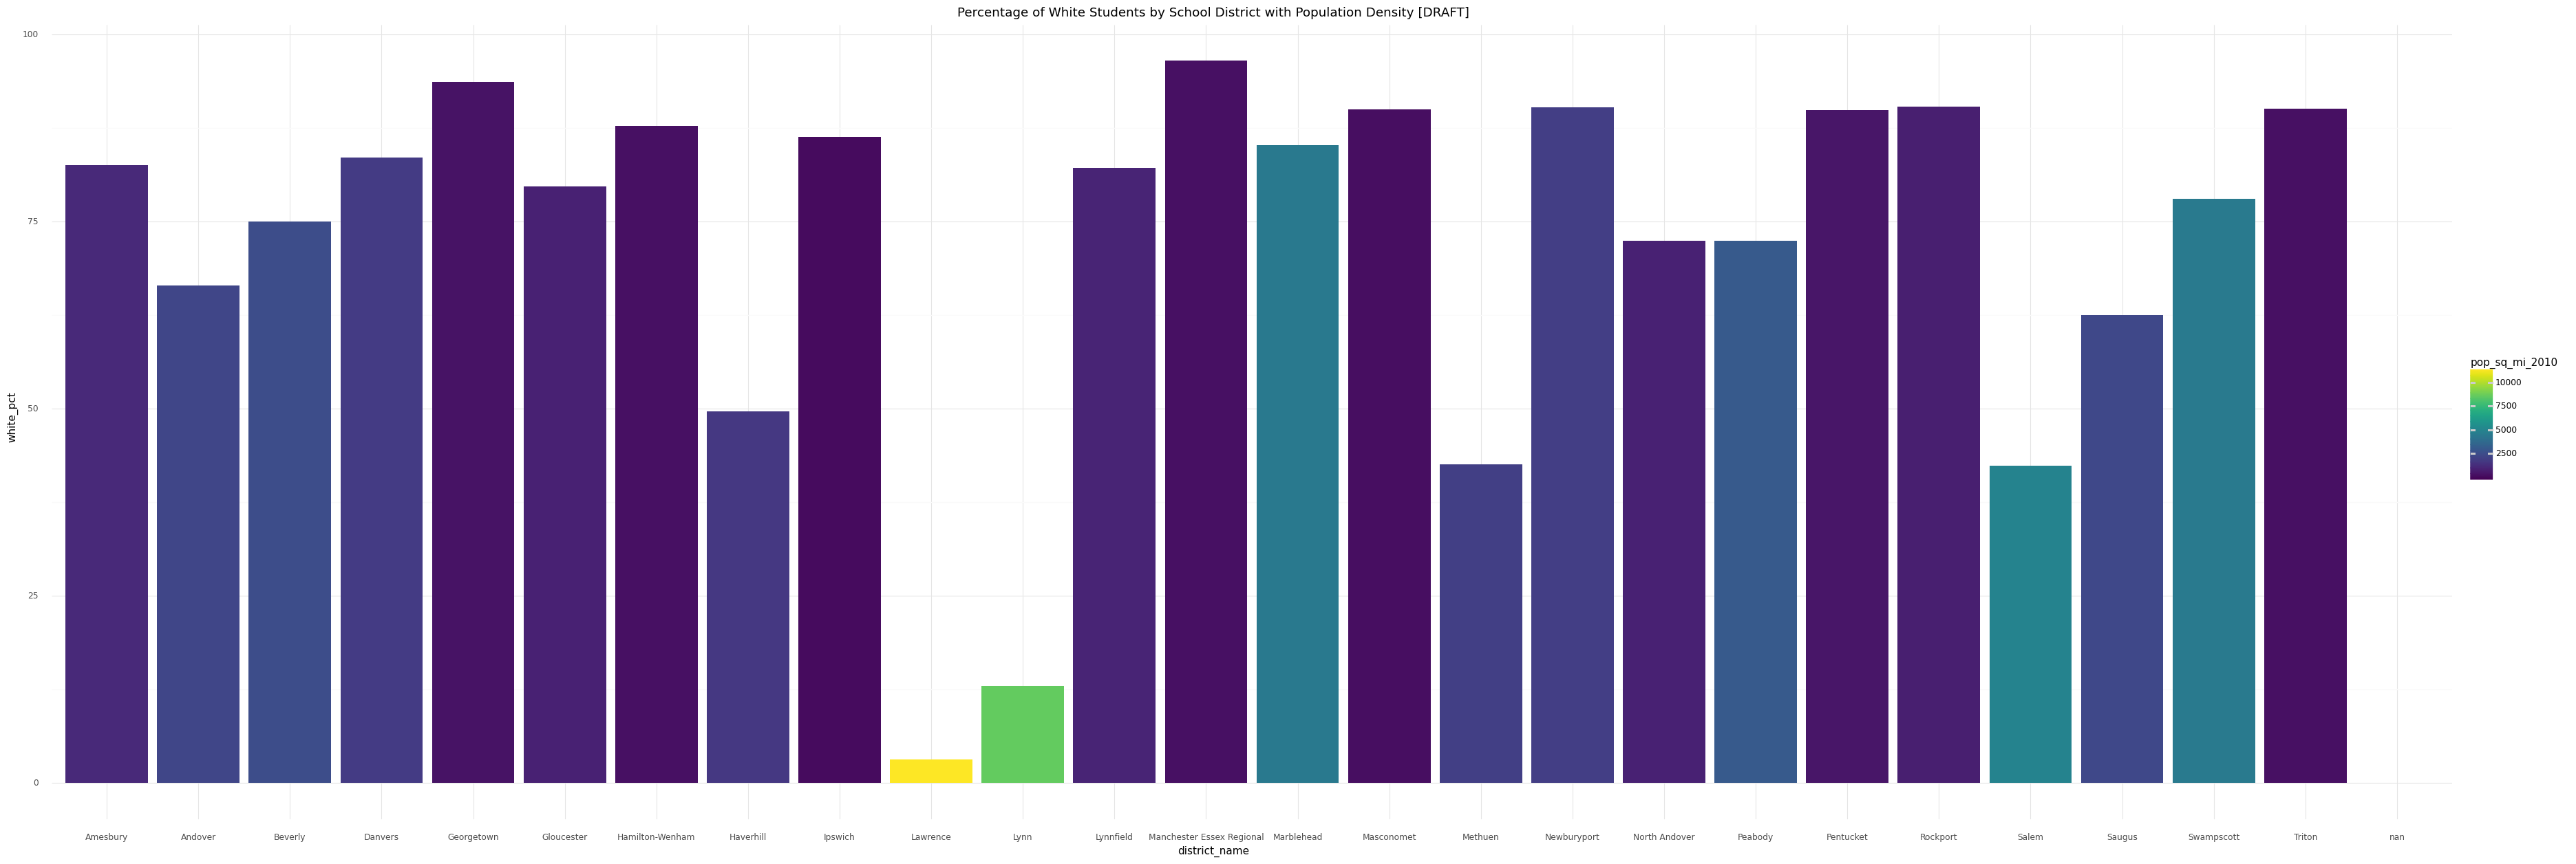

<ggplot: (776758260)>

In [23]:
# How does the percentage of white students compare the population density per district?
(
    ggplot(df_subset2,
           aes('district_name','white_pct', fill='pop_sq_mi_2010'))
           + geom_bar(stat='identity', position='dodge')
           + theme_minimal()
           + labs(title = "Percentage of White Students by School District with Population Density [DRAFT]")
            + theme(figure_size=(45, 15))

)

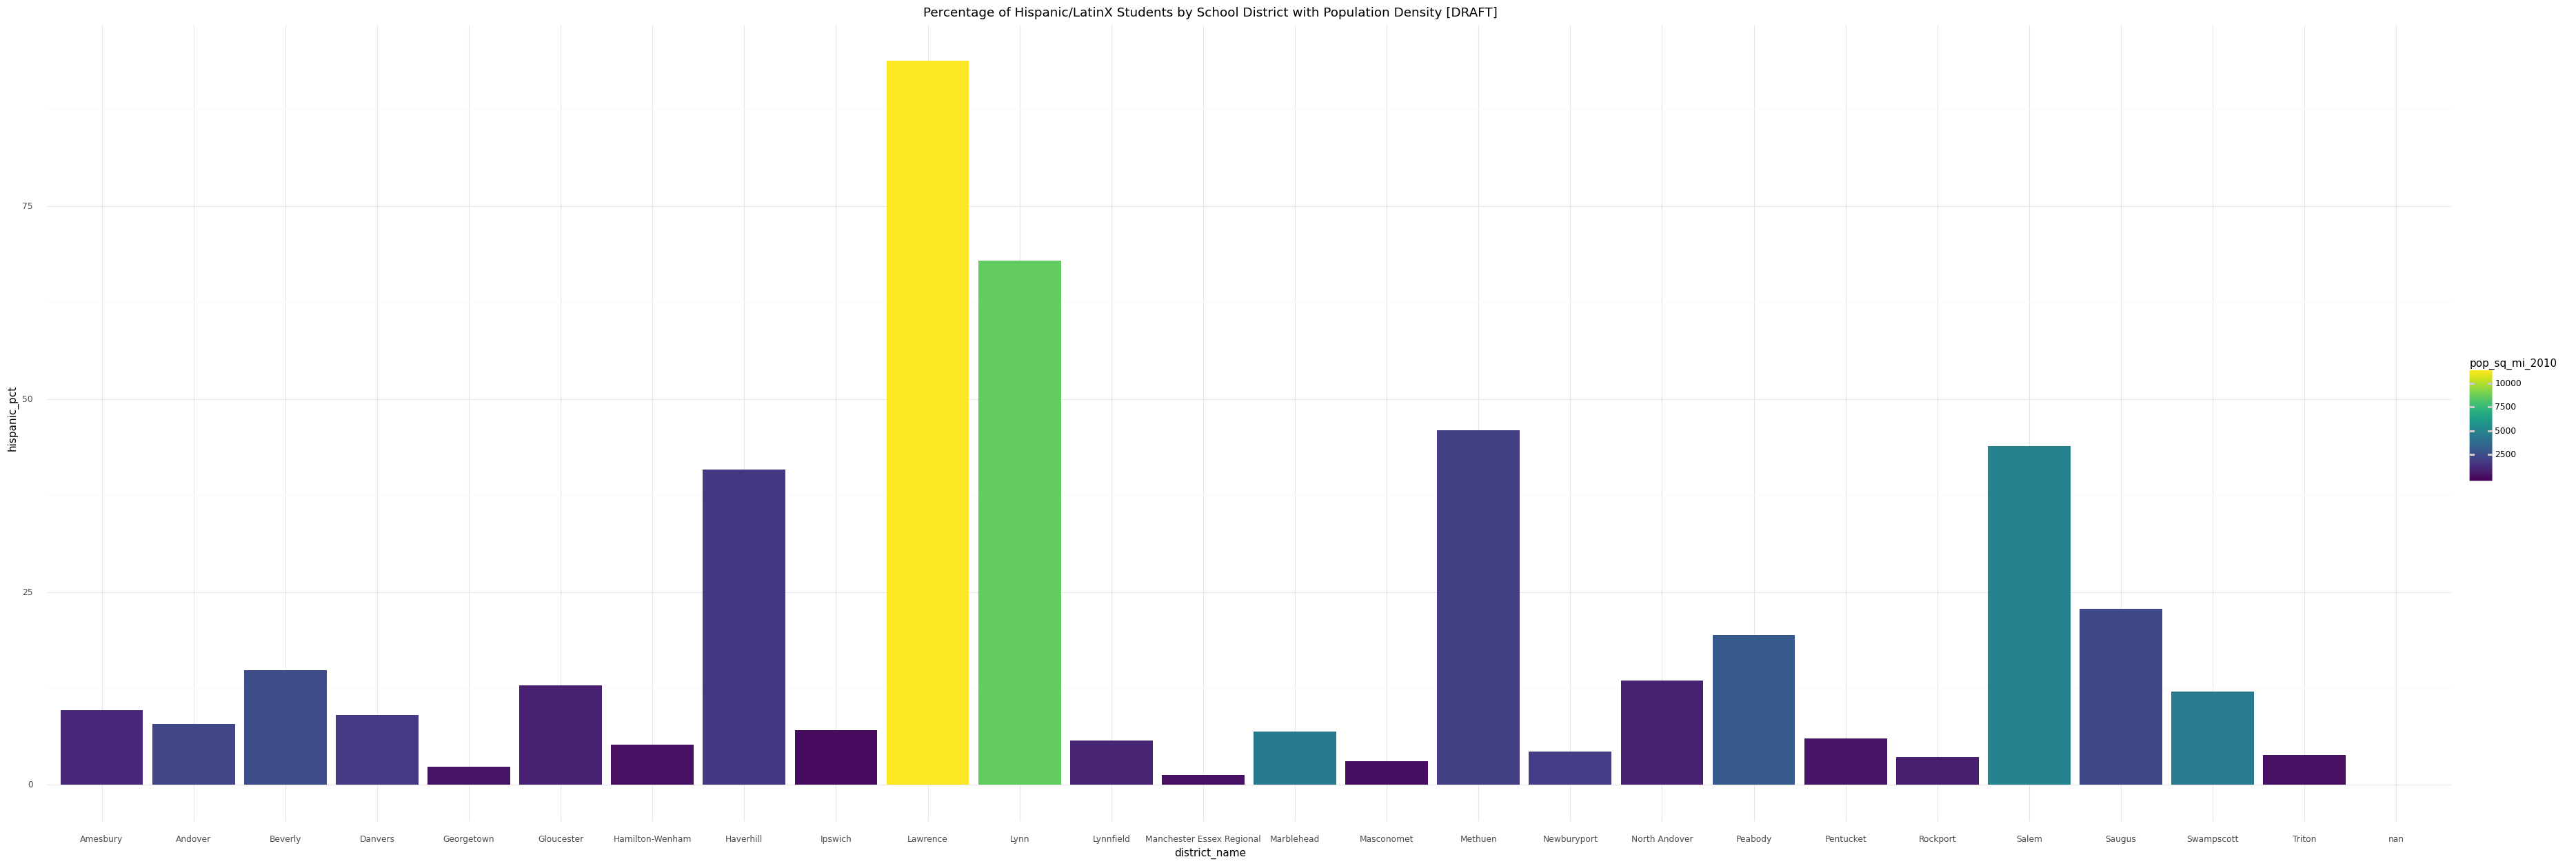

<ggplot: (774845654)>

In [24]:
#Inversely, how does the percentage of hispanic/latinx students compare across districts and population density?
(
    ggplot(df_subset2,
           aes('district_name', 'hispanic_pct', fill='pop_sq_mi_2010'))
           + geom_bar(stat='identity', position='dodge')
           + theme_minimal()
            + labs(title = "Percentage of Hispanic/LatinX Students by School District with Population Density [DRAFT]")
            + theme(figure_size=(45, 15))

)

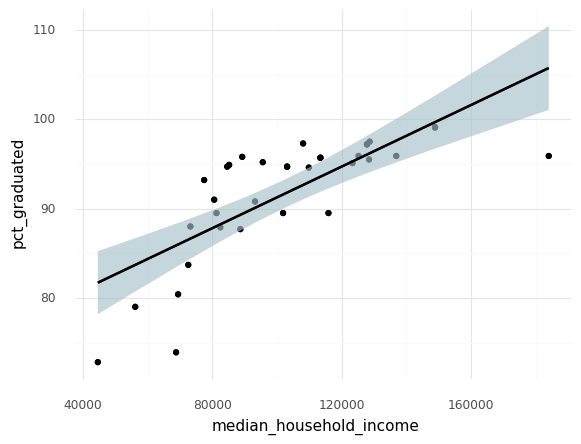

<ggplot: (779196573)>

In [25]:
# Is there a correlation between median household income and graduation rate?
(
    ggplot(df_subset, aes(x='median_household_income', y='pct_graduated')) + geom_point()  + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

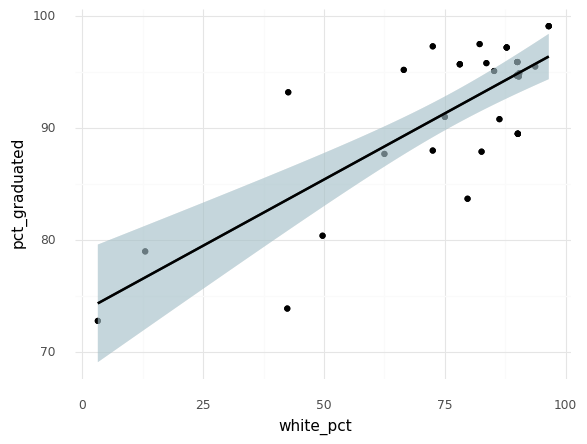

<ggplot: (779196945)>

In [26]:
# Is there a correlation between white percentage of school population and graduation rate?
(
    ggplot(df_subset, aes(x='white_pct', y='pct_graduated')) + geom_point()  + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

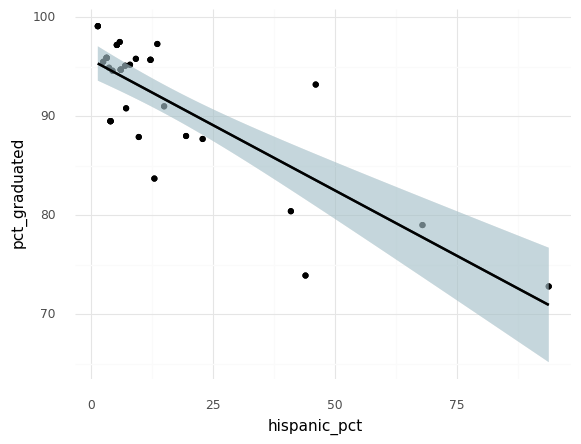

<ggplot: (779259715)>

In [27]:
# Is there a correlation between hispanic percentage of school population and graduation rate?
(
    ggplot(df_subset, aes(x='hispanic_pct', y='pct_graduated')) + geom_point()  + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

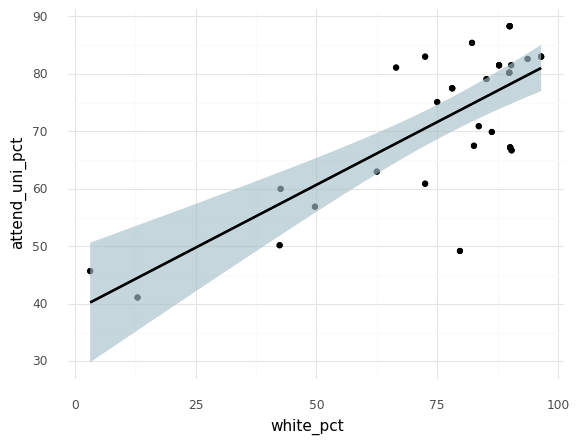

<ggplot: (779176453)>

In [28]:
# Is there a correlation between white percentage of school population and attending university
(
    ggplot(df_subset, aes(x='white_pct', y='attend_uni_pct')) + geom_point()  + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

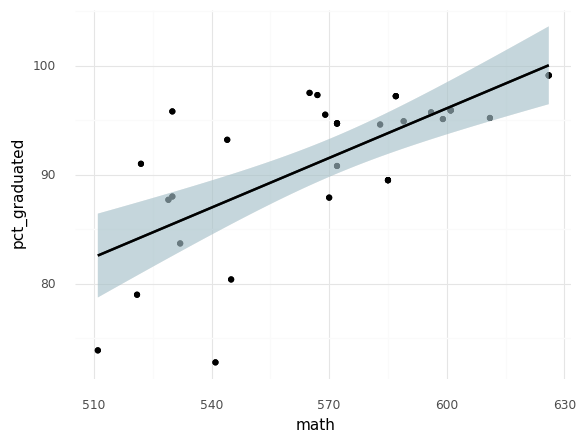

<ggplot: (783826413)>

In [29]:
# Is there a correlation between math scores to graduation percentage?
(
    ggplot(df_subset, aes(x='math', y='pct_graduated')) + geom_point() + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

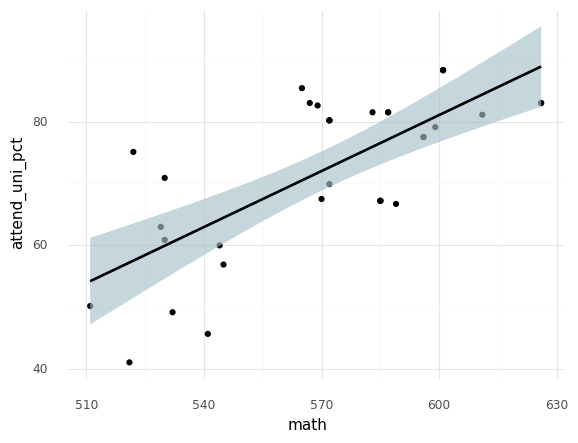

<ggplot: (779290528)>

In [30]:
# Is there a correlation between math scores to graduation percentage?
(
    ggplot(df_subset, aes(x='math', y='attend_uni_pct')) + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

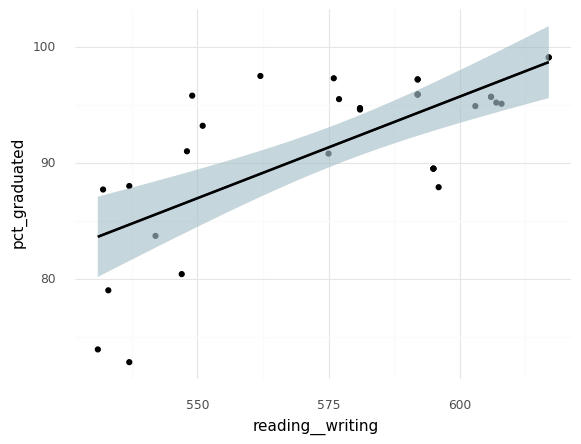

<ggplot: (779233797)>

In [31]:
# Is there a correlation between math scores to graduation percentage?
(
    ggplot(df_subset, aes(x='reading__writing', y='pct_graduated')) + geom_point() + geom_smooth(method='lm') + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") + theme_minimal()
)

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



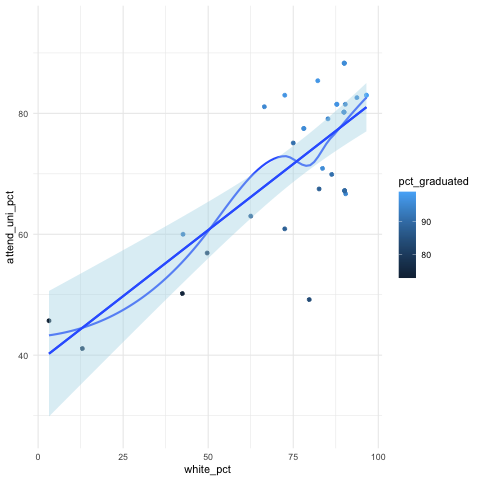

In [32]:
%%R -i df_subset2

mtcars
plt <-(ggplot(df_subset2,          
        aes(white_pct, attend_uni_pct, color = pct_graduated)) 
        + geom_point()
        + stat_smooth(fill="#FAFAFA", alpha = .0, method="loess")
        + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm")
        + stat_smooth(fill="#F87060", alpha = .0, method="glm")
        + theme_minimal()
)
plt

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



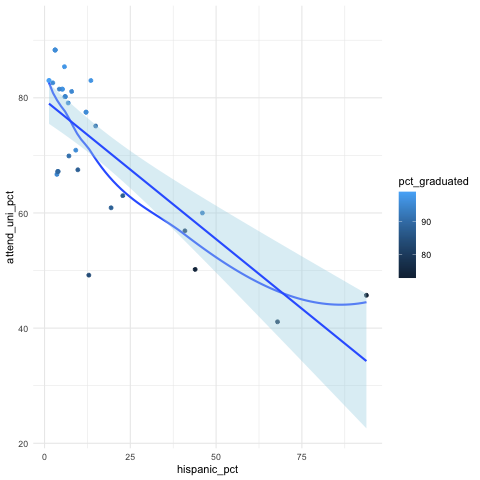

In [33]:
%%R -i df_subset2

mtcars
plt <-(ggplot(df_subset2,          
        aes(hispanic_pct, attend_uni_pct, color = pct_graduated)) 
        + geom_point()
        + stat_smooth(fill="#FAFAFA", alpha = .0, method="loess")
        + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm")
        + theme_minimal()
)
plt

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



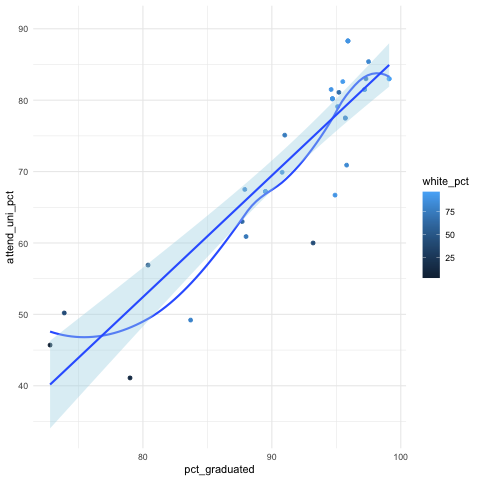

In [34]:
%%R -i df_subset2

mtcars
plt <-(ggplot(df_subset2,          
        aes(pct_graduated, attend_uni_pct, color = white_pct)) 
        + geom_point()
        + stat_smooth(fill="#FAFAFA", alpha = .0, method="loess")
        + stat_smooth(fill="#ADD8E6", alpha = .4, method="lm")
        + theme_minimal()
)
plt

### Regressions and Models (exploratory)

##### White Percentage  (r-squared: 0.607 + 0.575)

In [35]:
# Percentage of White Students --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ white_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     49.47
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           5.66e-08
Time:                        08:20:10   Log-Likelihood:                -96.845
No. Observations:                  34   AIC:                             197.7
Df Residuals:                      32   BIC:                             200.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.6078      2.679     27.473      0.000      68.150      79.065
white_pct      0.2361      0.034      7.034      0.000       0.168       0.304
==============================================================================
Omnibus:                        0.855   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.461
Skew:                          -0.285   Prob(JB):                        0.794
Kurtosis:                       3.011   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Percentage of White Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ white_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     43.29
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.05e-07
Time:                        08:20:10   Log-Likelihood:                -120.05
No. Observations:                  34   AIC:                             244.1
Df Residuals:                      32   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8455      5.302      7.327      0.000      28.046      49.645
white_pct      0.4371      0.066      6.580      0.000       0.302       0.572
==============================================================================
Omnibus:                        4.197   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.927
Skew:                          -0.689   Prob(JB):                        0.231
Kurtosis:                       3.408   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Median Household Income  (r-squared: 0.567 + 0.687)

In [37]:
# Median Household Income --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     41.92
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.77e-07
Time:                        08:20:10   Log-Likelihood:                -98.498
No. Observations:                  34   AIC:                             201.0
Df Residuals:                      32   BIC:                             204.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  74.0052      2.844     26.020      0.000      68.212      79.799
median_household_income     0.0002   2.66e-05      6.475      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.418   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.980
Skew:                          -0.889   Prob(JB):                       0.0829
Kurtosis:                       3.595   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Median Household Income --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     70.17
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.43e-09
Time:                        08:20:10   Log-Likelihood:                -114.86
No. Observations:                  34   AIC:                             233.7
Df Residuals:                      32   BIC:                             236.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  35.2869      4.602      7.668      0.000      25.913      44.661
median_household_income     0.0004   4.31e-05      8.377      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.537
Skew:                          -0.172   Prob(JB):                        0.765
Kurtosis:                       2.490   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Hispanic/Latinx Population

In [39]:
# Percentage of Latino students --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ hispanic_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     57.20
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.29e-08
Time:                        08:20:10   Log-Likelihood:                -95.304
No. Observations:                  34   AIC:                             194.6
Df Residuals:                      32   BIC:                             197.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       95.6729      0.878    108.996      0.000      93.885      97.461
hispanic_pct    -0.2638      0.035     -7.563      0.000      -0.335      -0.193
==============================================================================
Omnibus:                        2.806   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.635
Skew:                          -0.482   Prob(JB):                        0.442
Kurtosis:                       3.473   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Foreign Born Population  (r-squared: 0.342)

In [40]:
# Foreign Born Population --> Percentage of Students graduating?

import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ foreign_born_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     16.64
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           0.000280
Time:                        08:20:10   Log-Likelihood:                -105.61
No. Observations:                  34   AIC:                             215.2
Df Residuals:                      32   BIC:                             218.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           96.5611      1.523     63.409      0.000      93.459      99.663
foreign_born_pct   -46.8462     11.483     -4.080      0.000     -70.236     -23.456
==============================================================================
Omnibus:                        6.274   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.960
Skew:                          -0.906   Prob(JB):                       0.0837
Kurtosis:                       3.464   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Reading/Writing Scores + Math Scores with Graduation Rates (r-squared: 0.494)

In [41]:
# trying to see how to get the highest r-squared based on the current variables 
# Median Household Income + Percentage of White Students + reading/writing scores+ math scores + average class size --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~  reading__writing + math", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     15.10
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.64e-05
Time:                        08:20:10   Log-Likelihood:                -101.17
No. Observations:                  34   AIC:                             208.3
Df Residuals:                      31   BIC:                             212.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -5.3316     19.516     -0.273      0.787     -45.136      34.472
reading__writing     0.1029      0.110      0.936      0.357      -0.121       0.327
math                 0.0660      0.096      0.689      0.496      -0.129       0.261
==============================================================================
Omnibus:                        2.008   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.366   Jarque-Bera (JB):                1.163
Skew:                          -0.438   Prob(JB):                        0.559
Kurtosis:                       3.229   Cond. No.                     1.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Population Density  (r-squared: 0.414)

In [42]:
# Population Density (Population per Square Mile in 2010 Census) --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ pop_sq_mi_2010", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     22.57
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           4.10e-05
Time:                        08:20:10   Log-Likelihood:                -103.66
No. Observations:                  34   AIC:                             211.3
Df Residuals:                      32   BIC:                             214.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         95.4944      1.202     79.469      0.000      93.047      97.942
pop_sq_mi_2010    -0.0018      0.000     -4.750      0.000      -0.003      -0.001
==============================================================================
Omnibus:                        3.459   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.530
Skew:                          -0.664   Prob(JB):                        0.282
Kurtosis:                       3.145   Cond. No.                     4.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Graduated Students to Percentage of Students Attending University  (r-squared: 0.801)

In [43]:
# Percentage of Students that Graduated --> Percentage of Students that went on to attend university? 
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ pct_graduated", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           9.68e-13
Time:                        08:20:10   Log-Likelihood:                -107.18
No. Observations:                  34   AIC:                             218.4
Df Residuals:                      32   BIC:                             221.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -83.7464     13.809     -6.065      0.000    -111.874     -55.619
pct_graduated     1.7021      0.150     11.336      0.000       1.396       2.008
==============================================================================
Omnibus:                        3.521   Durbin-Watson:                   2.620
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.521
Skew:                          -0.659   Prob(JB):                        0.284
Kurtosis:                       3.200   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Class Size to Graduation Percentage  (r-squared: 0.010) [Unhelpful]

In [44]:
# Average Class Size --> Percentage of Students that graduated?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ avg_class_size", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.3238
Date:                Sat, 26 Mar 2022   Prob (F-statistic):              0.573
Time:                        08:20:10   Log-Likelihood:                -112.56
No. Observations:                  34   AIC:                             229.1
Df Residuals:                      32   BIC:                             232.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.9776     11.054      8.864      0.000      75.462     120.493
avg_class_size    -0.3984      0.700     -0.569      0.573      -1.825       1.028
==============================================================================
Omnibus:                       14.470   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.963
Skew:                          -1.471   Prob(JB):                     0.000564
Kurtosis:                       4.381   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### White Percentage + Median Household Income Correlating with Graduation Rates ( r-squared: 0.702)

In [45]:
# Median Household Income + Percentage of White Students --> Percentage of Students that graduated?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     36.49
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           7.13e-09
Time:                        08:20:10   Log-Likelihood:                -92.157
No. Observations:                  34   AIC:                             190.3
Df Residuals:                      31   BIC:                             194.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  70.3413      2.590     27.158      0.000      65.059      75.624
white_pct                   0.1508      0.040      3.744      0.001       0.069       0.233
median_household_income  9.555e-05   3.05e-05      3.137      0.004    3.34e-05       0.000
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.463
Skew:                          -0.146   Prob(JB):                        0.793
Kurtosis:                       3.491   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### White Percentage + Median Household Income Correlating with % Attending University  (r-squared: 0.759)

In [46]:
# Median Household Income + Percentage of White Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     48.92
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.57e-10
Time:                        08:20:10   Log-Likelihood:                -110.38
No. Observations:                  34   AIC:                             226.8
Df Residuals:                      31   BIC:                             231.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.1719      4.426      6.816      0.000      21.144      39.200
white_pct                   0.2105      0.069      3.058      0.005       0.070       0.351
median_household_income     0.0003    5.2e-05      4.874      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.283
Skew:                          -0.223   Prob(JB):                        0.868
Kurtosis:                       3.018   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Multiple variables with % Attending University  (r-squared: 0.776) [not all that different from prior regression] 

In [47]:
# trying to see how to get the highest r-squared based on the current variables 
# Median Household Income + Percentage of White Students + reading/writing scores+ math scores + average class size --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~  white_pct + median_household_income + reading__writing + math + avg_class_size + foreign_born_pct + pop_sq_mi_2010", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     12.89
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           4.92e-07
Time:                        08:20:10   Log-Likelihood:                -109.14
No. Observations:                  34   AIC:                             234.3
Df Residuals:                      26   BIC:                             246.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -8.4488     39.508     -0.214      0.832     -89.659      72.761
white_pct                   0.2301      0.184      1.250      0.222      -0.148       0.608
median_household_income     0.0002   7.47e-05      2.759      0.010    5.25e-05       0.000
reading__writing           -0.0525      0.202     -0.260      0.797      -0.467       0.362
math                        0.1083      0.182      0.594      0.558      -0.267       0.483
avg_class_size              0.6459      0.729      0.886      0.384      -0.853       2.145
foreign_born_pct           -1.4533     49.094     -0.030      0.977    -102.367      99.460
pop_sq_mi_2010              0.0002      0.001      0.192      0.849      -0.002       0.003
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.196
Skew:                          -0.104   Prob(JB):                        0.907
Kurtosis:                       2.691   Cond. No.                     4.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# # trying to see how to get the highest r-squared based on the current variables 
# # Median Household Income + Percentage of White Students + reading/writing scores+ math scores + average class size --> Percentage of Students attending university?
# import statsmodels.formula.api as smf

# model = smf.logit("attend_uni_pct ~  white_pct + median_household_income + reading__writing + math + avg_class_size + foreign_born_pct + pop_sq_mi_2010", data=df_subset)
# results = model.fit()
# results.summary()

### Regressions and Models (exploratory)

In [49]:
# Median Household Income + Percentage of White Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     48.92
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.57e-10
Time:                        08:20:10   Log-Likelihood:                -110.38
No. Observations:                  34   AIC:                             226.8
Df Residuals:                      31   BIC:                             231.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.1719      4.426      6.816      0.000      21.144      39.200
white_pct                   0.2105      0.069      3.058      0.005       0.070       0.351
median_household_income     0.0003    5.2e-05      4.874      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.283
Skew:                          -0.223   Prob(JB):                        0.868
Kurtosis:                       3.018   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Looking at Residuals with .predict() and .resid

In [51]:
df_subset['predicted_uni_pct'] = results.predict()
# df_subset['residuals_uni_pct'] = df_subset['attend_uni_pct'] - df_subset['predicted_uni_pct']
df_subset['residuals_uni_pct'] = results.resid

df_subset.sort_values(by='residuals_uni_pct')

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,high_school_graduates_num,attending_colluniv_num,attend_uni_pct,private_four-year_pct,reading__writing,math,num_in_cohort,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,population_census_april_1_2010,white_alone_pct,black_or_african_american_alone_pct,american_indian_and_alaska_native_alone_pct,asian_alone_pct,native_hawaiian_and_other_pacific_islander_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,persons_per_household_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010,land_area_in_square_miles_2010,predicted_uni_pct,residuals_uni_pct
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,177.0,87.0,49.2,39.1,542.0,532.0,190,83.7,5.8,Gloucester,Gloucester High School,29729,28789,0.936,0.017,0.000,0.019,0.000,0.023,0.024,0.919,0.086,2.27,72574,43321,0.100,1099.0,26.20,65.362079,-16.162079
32,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Rowley,Triton Regional High School,6161,5856,0.959,0.012,0.000,0.011,0.000,0.016,0.008,0.954,0.033,2.86,115909,54885,0.044,321.6,18.21,78.545793,-11.345793
31,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Newbury,Triton Regional High School,6716,6666,0.937,0.010,0.000,0.016,0.000,0.012,0.030,0.921,0.040,2.68,101875,57871,0.089,285.4,23.35,74.985259,-7.785259
16,Masconomet,15.8,"1,692",0.7,3.7,3.1,90.0,0.1,0.2,2.4,83.5,281.0,248.0,88.3,47.2,592.0,601.0,291,95.9,1.7,Boxford,Masconomet Regional High School,8203,7965,0.945,0.000,0.000,0.020,0.000,0.035,0.024,0.935,0.046,2.92,184007,79705,0.002,338.1,23.56,95.801727,-7.501727
27,Salem,13.5,"3,772",6.6,2.6,43.9,42.4,0.0,0.0,4.5,56.1,219.0,110.0,50.2,27.3,531.0,511.0,276,73.9,10.9,Salem,Salem High School,44480,41340,0.790,0.066,0.006,0.025,0.000,0.038,0.178,0.718,0.146,2.25,68808,38400,0.147,4992.9,8.28,56.554637,-6.354637
11,Lynn,15.4,"12,825",8.2,7.5,67.9,13.0,0.3,0.0,3.1,23.3,1062.0,436.0,41.1,27.8,533.0,521.0,"1,254",79.0,13.7,Lynn,Lynn Classical High School + Lynn English High...,101253,90329,0.486,0.137,0.004,0.073,0.001,0.066,0.428,0.359,0.367,2.85,56181,26291,0.166,8409.5,10.74,47.162111,-6.062111
14,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Manchester,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449
13,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Essex,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449
26,Rockport,14.7,770,0.7,1.8,3.6,90.4,0.0,0.1,3.4,38.8,75.0,50.0,66.7,48.0,603.0,589.0,79,94.9,1.3,Rockport,Rockport High School,6992,6952,0.970,0.001,0.000,0.001,0.000,0.011,0.007,0.965,0.029,2.16,85208,51122,0.067,994.4,6.99,70.819866,-4.119866
22,Peabody,16.4,"5,813",3.8,2.1,19.4,72.5,0.2,0.0,2.0,56.5,335.0,204.0,60.9,37.7,537.0,530.0,374,88.0,5.9,Peabody,Peabody Veterans Memorial High School,54481,51251,0.899,0.038,0.004,0.011,0.000,0.027,0.099,0.827,0.154,2.41,73217,40095,0.086,3161.4,16.21,64.009549,-3.109549


In [52]:
# trying to see how to get the highest r-squared based on the current variables 
# Median Household Income + Percentage of White Students + reading/writing scores+ math scores + average class size --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~  white_pct + median_household_income + reading__writing + math + avg_class_size + pop_sq_mi_2010", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     15.62
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.17e-07
Time:                        08:20:10   Log-Likelihood:                -109.14
No. Observations:                  34   AIC:                             232.3
Df Residuals:                      27   BIC:                             243.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -8.8389     36.549     -0.242      0.811     -83.831      66.153
white_pct                   0.2336      0.139      1.678      0.105      -0.052       0.519
median_household_income     0.0002   7.31e-05      2.818      0.009     5.6e-05       0.000
reading__writing           -0.0505      0.187     -0.271      0.789      -0.433       0.332
math                        0.1062      0.166      0.640      0.527      -0.234       0.447
avg_class_size              0.6481      0.712      0.910      0.371      -0.813       2.109
pop_sq_mi_2010              0.0002      0.001      0.218      0.829      -0.002       0.002
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.192
Skew:                          -0.104   Prob(JB):                        0.908
Kurtosis:                       2.695   Cond. No.                     3.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
df_subset['predicted_uni_pct2'] = results.predict()
# df_subset['residuals_uni_pct'] = df_subset['attend_uni_pct'] - df_subset['predicted_uni_pct']
df_subset['residuals_uni_pct2'] = results.resid

df_subset.sort_values(by='residuals_uni_pct2')

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,high_school_graduates_num,attending_colluniv_num,attend_uni_pct,private_four-year_pct,reading__writing,math,num_in_cohort,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,population_census_april_1_2010,white_alone_pct,black_or_african_american_alone_pct,american_indian_and_alaska_native_alone_pct,asian_alone_pct,native_hawaiian_and_other_pacific_islander_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,persons_per_household_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010,land_area_in_square_miles_2010,predicted_uni_pct,residuals_uni_pct,predicted_uni_pct2,residuals_uni_pct2
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,177.0,87.0,49.2,39.1,542.0,532.0,190,83.7,5.8,Gloucester,Gloucester High School,29729,28789,0.936,0.017,0.000,0.019,0.000,0.023,0.024,0.919,0.086,2.27,72574,43321,0.100,1099.0,26.20,65.362079,-16.162079,62.590567,-13.390567
32,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Rowley,Triton Regional High School,6161,5856,0.959,0.012,0.000,0.011,0.000,0.016,0.008,0.954,0.033,2.86,115909,54885,0.044,321.6,18.21,78.545793,-11.345793,79.194765,-11.994765
31,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Newbury,Triton Regional High School,6716,6666,0.937,0.010,0.000,0.016,0.000,0.012,0.030,0.921,0.040,2.68,101875,57871,0.089,285.4,23.35,74.985259,-7.785259,76.296974,-9.096974
14,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Manchester,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449,89.407731,-6.407731
13,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Essex,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449,89.407731,-6.407731
16,Masconomet,15.8,"1,692",0.7,3.7,3.1,90.0,0.1,0.2,2.4,83.5,281.0,248.0,88.3,47.2,592.0,601.0,291,95.9,1.7,Boxford,Masconomet Regional High School,8203,7965,0.945,0.000,0.000,0.020,0.000,0.035,0.024,0.935,0.046,2.92,184007,79705,0.002,338.1,23.56,95.801727,-7.501727,94.336895,-6.036895
26,Rockport,14.7,770,0.7,1.8,3.6,90.4,0.0,0.1,3.4,38.8,75.0,50.0,66.7,48.0,603.0,589.0,79,94.9,1.3,Rockport,Rockport High School,6992,6952,0.970,0.001,0.000,0.001,0.000,0.011,0.007,0.965,0.029,2.16,85208,51122,0.067,994.4,6.99,70.819866,-4.119866,71.680970,-4.980970
33,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Salisbury,Triton Regional High School,9236,8283,0.959,0.007,0.001,0.011,0.002,0.010,0.036,0.928,0.049,2.39,81304,43214,0.062,536.9,15.43,69.766239,-2.566239,72.114271,-4.914271
11,Lynn,15.4,"12,825",8.2,7.5,67.9,13.0,0.3,0.0,3.1,23.3,1062.0,436.0,41.1,27.8,533.0,521.0,"1,254",79.0,13.7,Lynn,Lynn Classical High School + Lynn English High...,101253,90329,0.486,0.137,0.004,0.073,0.001,0.066,0.428,0.359,0.367,2.85,56181,26291,0.166,8409.5,10.74,47.162111,-6.062111,45.967954,-4.867954
22,Peabody,16.4,"5,813",3.8,2.1,19.4,72.5,0.2,0.0,2.0,56.5,335.0,204.0,60.9,37.7,537.0,530.0,374,88.0,5.9,Peabody,Peabody Veterans Memorial High School,54481,51251,0.899,0.038,0.004,0.011,0.000,0.027,0.099,0.827,0.154,2.41,73217,40095,0.086,3161.4,16.21,64.009549,-3.109549,63.659052,-2.759052


##### Finding outliers with z-scores 

In [54]:
df_subset['residuals_uni_pct2_z_score'] = (results.resid - results.resid.mean()) / results.resid.std()

df_subset.sort_values(by='residuals_uni_pct2')

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,high_school_graduates_num,attending_colluniv_num,attend_uni_pct,private_four-year_pct,reading__writing,math,num_in_cohort,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,population_census_april_1_2010,white_alone_pct,black_or_african_american_alone_pct,american_indian_and_alaska_native_alone_pct,asian_alone_pct,native_hawaiian_and_other_pacific_islander_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,persons_per_household_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mi_2010,land_area_in_square_miles_2010,predicted_uni_pct,residuals_uni_pct,predicted_uni_pct2,residuals_uni_pct2,residuals_uni_pct2_z_score
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,177.0,87.0,49.2,39.1,542.0,532.0,190,83.7,5.8,Gloucester,Gloucester High School,29729,28789,0.936,0.017,0.000,0.019,0.000,0.023,0.024,0.919,0.086,2.27,72574,43321,0.100,1099.0,26.20,65.362079,-16.162079,62.590567,-13.390567,-2.200379
32,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Rowley,Triton Regional High School,6161,5856,0.959,0.012,0.000,0.011,0.000,0.016,0.008,0.954,0.033,2.86,115909,54885,0.044,321.6,18.21,78.545793,-11.345793,79.194765,-11.994765,-1.971017
31,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Newbury,Triton Regional High School,6716,6666,0.937,0.010,0.000,0.016,0.000,0.012,0.030,0.921,0.040,2.68,101875,57871,0.089,285.4,23.35,74.985259,-7.785259,76.296974,-9.096974,-1.494843
14,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Manchester,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449,89.407731,-6.407731,-1.052938
13,Manchester Essex Regional,14.8,"1,271",0.5,1.2,1.3,96.5,0.0,0.0,0.6,77.7,112.0,93.0,83.0,40.9,617.0,626.0,111,99.1,0.0,Essex,Manchester Essex Regional High School,5395,5136,0.986,0.000,0.000,0.007,0.000,0.006,0.015,0.971,0.078,2.59,148854,74989,0.033,556.5,9.23,88.251449,-5.251449,89.407731,-6.407731,-1.052938
16,Masconomet,15.8,"1,692",0.7,3.7,3.1,90.0,0.1,0.2,2.4,83.5,281.0,248.0,88.3,47.2,592.0,601.0,291,95.9,1.7,Boxford,Masconomet Regional High School,8203,7965,0.945,0.000,0.000,0.020,0.000,0.035,0.024,0.935,0.046,2.92,184007,79705,0.002,338.1,23.56,95.801727,-7.501727,94.336895,-6.036895,-0.992001
26,Rockport,14.7,770,0.7,1.8,3.6,90.4,0.0,0.1,3.4,38.8,75.0,50.0,66.7,48.0,603.0,589.0,79,94.9,1.3,Rockport,Rockport High School,6992,6952,0.970,0.001,0.000,0.001,0.000,0.011,0.007,0.965,0.029,2.16,85208,51122,0.067,994.4,6.99,70.819866,-4.119866,71.680970,-4.980970,-0.818488
33,Triton,16.9,"2,198",1.6,2.1,3.9,90.1,0.1,0.1,2.0,69.0,174.0,117.0,67.2,30.8,595.0,585.0,190,89.5,3.7,Salisbury,Triton Regional High School,9236,8283,0.959,0.007,0.001,0.011,0.002,0.010,0.036,0.928,0.049,2.39,81304,43214,0.062,536.9,15.43,69.766239,-2.566239,72.114271,-4.914271,-0.807528
11,Lynn,15.4,"12,825",8.2,7.5,67.9,13.0,0.3,0.0,3.1,23.3,1062.0,436.0,41.1,27.8,533.0,521.0,"1,254",79.0,13.7,Lynn,Lynn Classical High School + Lynn English High...,101253,90329,0.486,0.137,0.004,0.073,0.001,0.066,0.428,0.359,0.367,2.85,56181,26291,0.166,8409.5,10.74,47.162111,-6.062111,45.967954,-4.867954,-0.799917
22,Peabody,16.4,"5,813",3.8,2.1,19.4,72.5,0.2,0.0,2.0,56.5,335.0,204.0,60.9,37.7,537.0,530.0,374,88.0,5.9,Peabody,Peabody Veterans Memorial High School,54481,51251,0.899,0.038,0.004,0.011,0.000,0.027,0.099,0.827,0.154,2.41,73217,40095,0.086,3161.4,16.21,64.009549,-3.109549,63.659052,-2.759052,-0.453376


In [55]:
df_subset_uni = df_subset.sort_values(by='residuals_uni_pct2')

In [56]:
df_subset.to_csv('output_subset.csv')

##### Plotting the Residuals

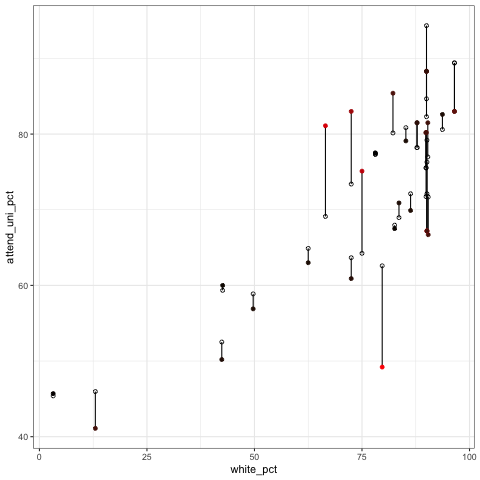

In [57]:
%%R -i df_subset

df
plt <-ggplot(df_subset) + 
    aes(x = white_pct) +
    aes(y = attend_uni_pct) +
    geom_segment(aes(xend = white_pct, yend = predicted_uni_pct2)) +
#     aes(y = attend_uni_pct) +
    geom_point(aes(color = abs(residuals_uni_pct2))) +
    scale_color_continuous(low = "black", high = "red") +
    guides(color = FALSE) + 
#     geom_point() +
    geom_point(aes(y = predicted_uni_pct2), shape = 1) +
    theme_bw()  
#     stat_smooth(fill="#FAFAFA", alpha = .0, method="loess") +
#     stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") +
#     stat_smooth(fill="#F87060", alpha = .0, method="glm")


plt

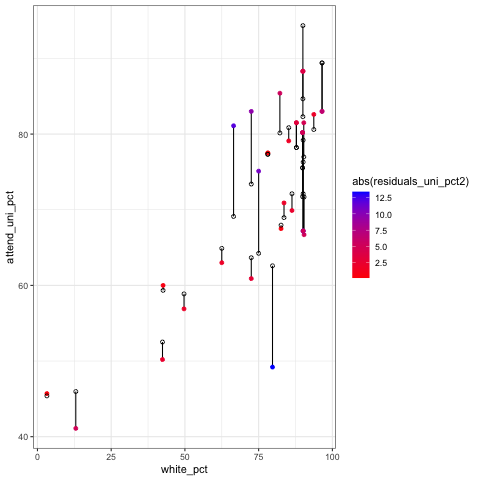

In [58]:
%%R -i df_subset

df
plt <-ggplot(df_subset) + 
    aes(x = white_pct) +
    aes(y = attend_uni_pct) +
    geom_segment(aes(xend = white_pct, yend = predicted_uni_pct2)) +
#     aes(y = attend_uni_pct) +
    geom_point(aes(color = abs(residuals_uni_pct2))) +
    scale_color_continuous(low = "red", high = "blue") +
#     guides(color = FALSE) + 
#     geom_point() +
    geom_point(aes(y = predicted_uni_pct2), shape = 1) +
    theme_bw()  
#     stat_smooth(fill="#FAFAFA", alpha = .0, method="loess") +
#     stat_smooth(fill="#ADD8E6", alpha = .4, method="lm") +
#     stat_smooth(fill="#F87060", alpha = .0, method="glm")


plt

-----

# Thoughts + Next Steps 👉 

Takeaways:
* A number of findings such as the percentage of white students and median household income were fairly indicative of a school's graduation rate (0.702) or college attendance rate (0.759).
* Interestingly, while the percentage of white students with median household income were more indicative of graduation rates (0.702) and attending college (0.759), they were less so of actual tests of what students learned in math (0.584) and reading/writing standardized tests (0.544). This might indicate that the ability for a student to graduate from high school or attend university is influenced by other factors beyond just learning the study material.
* The data includes measurements for academic performance and demographic factors but there still is a solid 22% of unexplained factors for the percentage of students that attend university. Some factors that come to mind that are not included would be social or cultural factors.
* Without using the variable for graduation percentage, the highest r-squared reached was 0.776 in factors contributing to the percentage of students attending university (Median Household Income + Percentage of White Students + reading/writing scores + math scores + average class size).

Predicting Percentage of Students Attending University based on Race and Median Household Income:
* By plotting the predictive values of university attendance based on median household income and percentage of white students, there are certain school districts that overfit or underfit the model and it's not completely clear by the data the reasons why (though there are some hints). 
* For example, the town of Boxford has a very high median household income ($184,007) and a high percentage of white students (90 percent) which would predict the highest university attendance rate of the dataset (94 percent) but students of the town attend a regional high school with two other towns which could contribute to why it's underfitting the model. Additional evidence for this is that the town of Middleton that attends the same regional school is overfitting the model. 
* There might also be a limit to the percentage of students attending university. The top three towns underfit the model even though the three towns have very high university attendance rates. Maybe there are other factors that would cause a limit to the percentage of students attending university. 
* One school that stands out as underperforming compared to its predicted rate is Gloucester High School, so there would need to be additional reporting to understand the situation at the school district better. 
* North Andover and Andover over fit their predicted values, which is interesting but more reporting is needed to look into why this is the case.

Developing a Story / Next Steps
* While on its own this data is a bit broad for a story, it is worth looking at why race correlates so highly with graduation rates and university attendance. For example, does race correlate with other factors not indicated in the dataset such as parents with higher-level degrees?
* I need to speak and do some reporting into school-level information regarding Gloucester, North Andover, and Andover High Schools to both see if there is key information not reflected in the data for those towns and to add nuance to the data currently available. 
* Additionally, I'd be interested to check with a statistician regarding the district-level data and particularly the z-scores because I am working under the assumption that the difference between predicted and actual university attendance rates might be indicative of schools under or overperforming, but a statistician might say a z-score of under 3 means there actually isn't much difference at all. 
